# 제6장. 머신러닝 - 지도학습
## 제1절. 단순 선형 회귀(Simple Linear Regression)
### 1. 개념
- 선형 회귀는 입력 특성에 대한 선형함수를 만들어 예측을 하는 알고리즘이다.
- 독립변수가 하나인 경우 특성 직선을 학습하는 것이다.
- 선형 회귀 모델을 잘 학습시키려면 MSE 값을 최소화하는 파라미터를 찾아야 한다.
- 통계적 방식의 회귀분석과 머신러닝 모델은 MSE 값을 최소화 하는 파라미터를 찾는다는 목표가 같지만, 문제해결을 위한 접근방식이 다르다.
  - 통계적 방식의 회귀분석은 정규방정식을 사용해 문제를 해결하지만, 머신러닝 모델은 경사하강법을 사용해 문제를 해결한다.

### 2. 정규방정식
- 정규방적식을 사용하면 MSE 값을 최소로 하는 파라미터를 바로 얻을 수 있다.
- 최소 자승법(Least Squared Method)을 코드로 구현할 수도 있고, scikit-learn 패키지에서 선형 회귀 함수를 import 해도 된다.

#### 1. scikit-learn의 LinearRegression
- scikit-learn 패키지로 선형 회귀 모델을 학습할 수 있다.
- scikit-learn의 linear_model의 여러 회귀함수 중, LinearRegression은 최소 자승법을 사용한 OLS(Ordinary Least Squares) 방식으로 선형 회귀 모델을 구현한다.
- 즉, LinearRegression은 계수 $w$를 사용해 선형 모델을 피팅하여 데이터세트에서 관찰된 대상과 선형 근사에 의해 예측된 대상 간의 잔차제곱합을 최소화한다.
```
sklearn.linear_model.LinearRegression(
  *,
  fit_intercept=True,
  normalize='deprecated',
  copy_X=True,
  n_jobs=None,
  positive=False
)
```
1. 매개변수
    - fit_intercept
      - bool(default=True)
      - 선형 회귀 모델에 대한 절편을 계산할지 여부를 결정한다.
      - False로 설정하면 절편을 사용하지 않는 모델로 계산한다.
    - normalize
      - bool(default=False)
      - True인 경우 X는 평균을 빼고 L2-norm으로 나누어 회귀 전에 정규화된다.
      - False인 경우 해당 정규화를 하지 않는다.
        - 표준화를 진행하고 싶으면, normalize=False로 설정한 뒤 fit()을 호출하기 전에 StandarScaler()를 사용하면 된다.
    - copy_X
      - bool(default=True)
      - True이면 X가 복사된다.
      - False이면 덮어쓴다.
    - n_jobs
      - int(default=None)
      - 계산 작업 횟수이다.
    - positive
      - bool(default=False)
      - True로 하면 계수가 양수가 된다.
2. 속성
    - coef_
    - rank_
    - singular_
    - intercept_
3. 메서드
    - fit(X, y[, sample_weight])
    - get_params([deep])
    - predict(X)
    - score(X, y[, sample_weight])
4. 코드 구현
    - 캐글의 insurance 데이터를 사용해 선형 회귀 모델을 구현해보자.
    - 먼저 캐글에 접속해 데이터를 다운받고 read한다(www.kaggle.com/mirichoi0218/insurance).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv(
  './datasets/insurance.csv'
)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


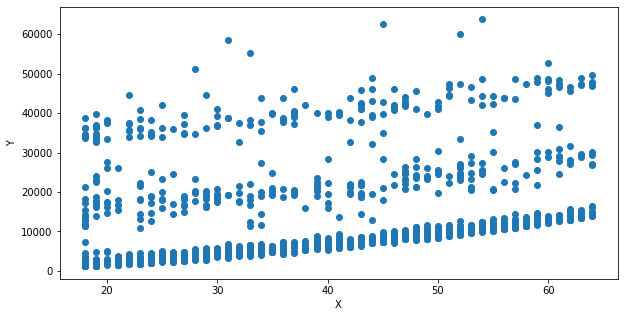

In [2]:
x = data['age']
y = data['charges']

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
x = np.array(data['age'])
y = np.array(data['charges'])

x = x.reshape(1338, 1)
y = y.reshape(1338, 1)

lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [4]:
print('선형 회귀 모델 결과')
print('절편', lr.intercept_, '계수', lr.coef_)

선형 회귀 모델 결과
절편 [3165.88500606] 계수 [[257.72261867]]


In [5]:
print(lr.score(x, y))

0.08940589967885804


In [6]:
x_new = [[19], [64]]
y_hat = lr.predict(x_new)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


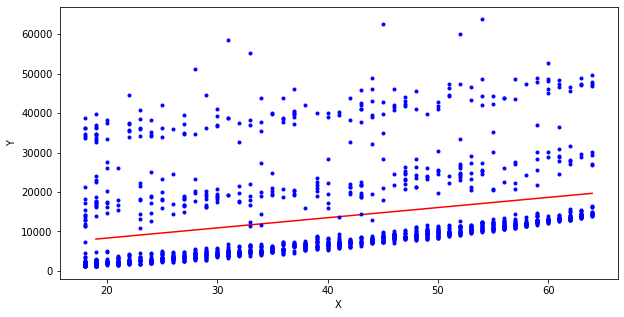

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(x_new, y_hat, 'r-')
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 3. 경사하강법
#### 1. 경사하강법(Gradient Descent)
- 경사하강법은 함수의 값이 낮아지는 방향으로 독립변수의 값을 바꿔가면서 최종적으로 최소 함수값을 갖도록 하는 독립 변숫값을 찾는 방식이다.
- 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 최적화 알고리즘으로서, 함수를 최소화하기 위해 파라미터를 반복적으로 조정해나간다.
- 머신러닝에서 함수의 최솟값을 찾는 방식으로 경사하강법을 사용하는 두 가지 이유는 다음과 같다.
  - 분석에서 마주하는 함수들은 형태가 복잡해 수식으로 미분계수와 그 해를 찾기 어려울 수 있다.
  - 데이터의 양이 큰 경우 경사하강법이 상대적으로 쉽게 컴퓨터로 구현될 수 있다.
- 무작위초기화(Random Initialization) 방식을 통해 임의의 값으로 시작해 한 번에 조금씩 함수의 값이 감소하는 방향으로 최솟값에 수렴할 때까지 점진적으로 진행한다.
- 학습 스텝의 크기를 학습률(Learning Rate)라고 한다.
  - 학습률이 너무 작으면 수렴하기까지 반복을 여러 번 수행해야 하므로 시간이 오래 걸린다는 단점이 있다.
  - 반대로 학습률을 너무 높이면 함수의 값이 발산되는 경향이 있다.
  - 하이퍼파라미터인 학습률을 적정한 크기로 조절해야 한다.

#### 2. 경사하강법의 종류
1. 배치 경사하강법
    - 반복 시 전체 훈련세트를 사용해 가중값을 갱신한다.
    - 계산량이 많아 훈련에 소요되는 시간이 증가한다.
    - 학습 시 발생하는 잡음이 적은 최적치를 찾을 수 있다.
2. 확률적 경사하강법
    - 한 개의 샘플데이터를 무작위로 선택하고 그 샘플에 대한 경사를 계산한다.
    - 매 반복마다 가중값이 달라지기 때문에 비용 함수가 최솟값에 접근할 때 확률값으로 요동치며 평균적으로 감소한다.
    - 최솟값에 요동치면서 접근하기 때문에 알고리즘이 멈출 때 최적치가 아닐 수 있다.
    - 하지만 지역 최솟값을 건너뛰고 전역 최솟값으로 다다를 가능성이 높고 데이터의 양이 많아도 계산 속도가 빠르다.
3. 미니 배치 경사하강법
    - 각 스텝을 반복할 때 임의의 30~50개 관측값으로 경사를 계산하고 모델의 가중값을 갱신한다.
    - 파라미터공간에서 확률적 경사하강법보다 지역 최솟값에서 빠져나오기 어려울 가능성이 있다.
    - 하지만 확률적 경사하강법보다 낮은 오차율을 가지게 되어 최솟값에 더 가까이 도달할 수 있다.
4. scikit-learn의 SGDRegressor
    - scikit-learn 패키지로 경사하강법을 활용한 선형 회귀 모델을 학습할 수 있다.
    - scikit-learn의 linear_model의 여러 함수 중,
	SGDRegressor는 확률적 경사하강법을 사용한 방식으로 회귀 모델을 구현한다.
    - 손실의 기울기는 각 샘플에서 한 번에 추정되며 모델은 감소하는 강도 즉,
	학습률에 따라 업데이트된다.
    - 정규화는 제곱 유클리드 norm L2 또는 절대 norm L1 또는 이 둘의 조합(elastic net)을 이용해 매개변수를 0벡터로 축소하는 손실 함수에 추가된 패널티이다.
    ```
    class sklearn.linear_model.SGDRegression(
      loss='squared_error',
      *,
      penalty='l2',
      alpha=0.0001,
      l1_ratio=0.15,
      fit_intercept=True,
      max_iter=1000,
      tol=0.001,
      shuffle=True,
      verbose=0,
      epsilon=0.1,
      random_state=None,
      learning_rate='invscaling',
      eta0=0.01,
      power_t=0.25,
      early_stopping=False,
      validation_fraction=0.1,
      n_iter_no_change=5,
      warm_start=False,
      average=False
    )
    ```
    **1. 매개변수**
    - `loss` : 사용할 손실 함수를 설정하는 매개변수이다. `squared_error`,
	`huber`, `epsilon_insensitive`, `squared_epsilon_insensitive`를 사용할 수 있다.
    - `penalty` : 사용할 패널티(정규화, Normalization)를 설정한다. `l1`, `l2` 또는 `elasticnet`을 사용할 수 있다. 선형 SVM 모델의 표준 정규화 장치인 `l2`가 기본값이다.
    - `alpha` : 정규화 항을 곱하는 상수이다. 값이 높을수록 정규화가 강해진다.
    - `l1_ratio` : `0`이면 L2 패널티이고 `1`이면 L1 패널티가 적용된다. `0이상 1이하`일 경우 elasticnet이 적용된다.
    - `fit_intercept` : 절편을 추정해야 하는지 여부이다. False이면 데이터가 이미 중앙에 있는 것으로 간주한다.
    - `max_iter` : 훈련 데이터(또는 epoch)에 대한 최대 패스 수이다.
    - `tol` : 중지 기준이다. `n_iter_no_charge`의 연속적인 에포크 동안 (loss > best_loss - tol)일 때 학습을 멈춘다. `early_stopping` 파라미터에 따라 training loss 또는 validation loss에 대해 수렴 여부를 확인한다.
    - `shuffle` : 각 epoch 이후에 학습데이터를 섞을지 여부를 말한다.
    - `verbose` : 자세한 정보 수준을 나타낸다.
    - `epsilon` : loss가 `huber`, `epsilon_insensitive` 또는 `squared_epsilon_insensitive`인 경우 엡실론 값을 나타낸다. `huber`의 경우 예측을 정확히 맞추는 것이 덜 중요해지는 임곗값을 결정한다. `epsilon_insensitive`인 경우 현재 예측과 올바른 레이블 간의 차이가 이 임곗값보다 작으면 무시한다.
    - `random_state` : `shuffle`이 `True`로 설정된 경우 데이터 셔플에 사용한다. 여러 함수 호출에서 재현 가능한 출력을 위해 int를 전달한다.
    - `learning_rate` : 학습률의 스케줄을 설정한다. `constant`, `optimal`, `invscaling`
    - `eta0` : 학습률의 초깃값을 설정한다.
    - `power_t` : `invscaling` 학습률의 지수이다.
    - `early_stopping` : Validation Score가 개선되지 않았을 때 학습을 멈출 것인지 여부에 대해 설정하는 것이다. `True`로 설정할 경우, 자동으로 훈련데이터의 일부를 검증으로 따로 설정하고 메서드에서 반환된 Validation Score가 연속적인 에포크 이상 동안 개선되지 않을 때 훈련을 종료한다.
    - `validation_fraction` : early stopping을 위해 학습데이터세트에서 일정부분 validation set으로 떼어 두는 비율을 말한다. 0~1사이의 값만 입력할 수 있다. `early_stopping`이 `True`로 설정되었을 때만 사용 가능하다.
    - `n_iter_no_charge` : 학습을 중지하기 전에 개선사항이 없는 학습을 반복하는 횟수이다.
    - `warm_start` : `True`로 설정하면 초기화에 맞게 이전 호출의 솔루션을 재사용하고, `Fasle`면 이전 솔루션을 지운다.
    - `average` : `True`로 설정하면 모든 업데이트에서 평균 SGD 가중치를 계산하고 그 결과를 `coef_` 속성에 저장한다. 만약 1보다 큰 정수를 설정할 경우, 표시된 샘플의 총 수가 average에 도달하면 평균화가 시작된다.
    
    **2. 속성**
    - `coef_` : featrue에 할당된 가중치이다.
    - `intercept_` : 선형 모델의 독립항(절편)이다.
    - `n_iter` : 중지 기준에 도달하기 전의 실제 반복 횟수이다.
    - `t_` : 훈련 중 수행된 가중치 업데이트 수이다.

    **3. 메서드**\
    대괄호 [] 안의 인자는 생략 가능하다.
    - `fit(X, y)` : 모델을 학습시킨다.
    - `get_params([deep])` : 모델의 매개변수를 가져온다.
    - `partial_fit(X, y)` : 주어진 샘플에 대해 한 epoch의 확률적 경사하강법을 수행한다.
    - `predict(X)` : 선형 모델을 사용해 예측한다.
    - `score(X, y[, sample_weight])` : 예측의 결정계수를 반환한다.

    **4. 코드 구현**\
    insurance 데이터로 선형 회귀 모델을 구현해보자.

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor

data = pd.read_csv('./datasets/insurance.csv')

x = np.array(data['age'])
y = np.array(data['charges'])

x = x.reshape(len(data), 1)
y = y.reshape(len(data), 1)

sgd_reg = SGDRegressor(
  max_iter=1000,
  random_state=34
)
sgd_reg.fit(x, y.ravel())

SGDRegressor(random_state=34)

In [9]:
print('SGD 회귀 모델 결과')
print('절편', sgd_reg.intercept_, '계수', sgd_reg.coef_)

SGD 회귀 모델 결과
절편 [9057.21833765] 계수 [484.13243757]


새로운 데이터 샘플을 SGD 회귀 모델에 입력한 뒤 나이에 따른 의료비용을 예측해보자.

In [10]:
x_new = [[19], [64]]
y_hat = sgd_reg.predict(x_new)
print(y_hat)

[18255.73465154 40041.69434233]


산점도 위에 회귀선을 그어 SGD 선형 모델이 데이터를 얼마나 설명할 수 있는지 시각화해보자.

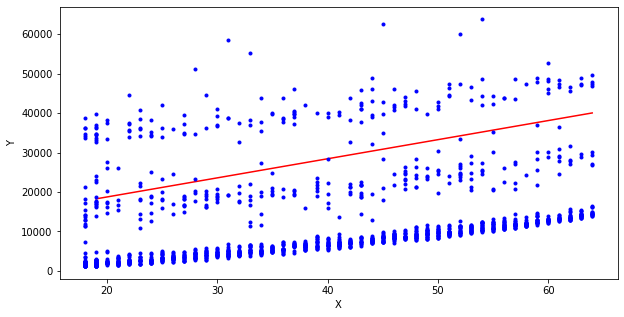

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 제2절. 다항 회귀(Polynomial Regression)
### 1. 개념
- 데이터가 단순한 직선 형태가 아닌 비선형의 형태를 갖고 있을 때, 각 변수의 거듭제곱을 새로운 변수로 추가하면 선형 모델을 사용할 수 있다.
- 이렇게 확장된 특성을 데이터세트에 선형 모델로 훈련시키는 기법을 다항 회귀(Polynomial Regression)라고 한다.
#### 1. 다항변수 생성
- scikit-learn의 `PolynomialFeatures(degree=d)`를 활용해 변수특성을 거듭제곱으로 변환한다.
- 이때 주어진 차수까지 변수 간의 모든 교차항을 추가한다.
- 이러한 이유로 설명변수가 여러 개일 때 다항 회귀는 일반적인 선형 회귀 모델과 달리 변수들 사이의 관계를 찾을 수 있다.
- 각 변수의 거듭제곱을 추가해 고차 다항 회귀를 적용하면 훈련데이터에 적합한 모델을 생성할 수 있으나, 과대적합의 가능성이 있어 주의할 필요가 있다.
#### 2. 선형결합
- `PolynomialFeatures`로 생성한 변수들을 `LinearRegression()`의 입력값으로 대입하면 다항 회귀분석을 수행할 수 있다.
- 매개변수와 속성, 메서드를 그대로 활용할 수 있다.

### 2. scikit-learn의 PolynomialFeatures
- 다항 회귀분석을 위해 다항변수를 생성하는 `PolynomialFeatures` 함수에 대해 알아보자.
- 다항 회귀는 다항변수를 생성한 뒤 `LinearRegression` 함수에 적용하면 된다.
```
class sklearn.preprocessing.PolynomialFeatures(
  degree=2,
  *,
  interaction_only=False,
  include_bias=True,
  order='C'
)
```
**1. 매개변수**
- `degree` : 다항식의 차수를 결정한다.
- `interaction_only` : 교차항을 추가할지 여부를 결정한다. `True`인 경우 교차항만 생성된다. `False`인 경우 교차항과 함께 동일한 변수의 2제곱 이상인 항도 추가된다.
- `include_bias` : bias 컬럼을 추가할지 결정한다. `True`인 경우 bias 컬럼을 추가하고, `False`인 경우 추가하지 않는다.

**2. 메서드**
- `fit_transform(X)` : 데이터를 적합시킨 뒤 변환한다.
- `transform` : 데이터를 다항 변수로 변환한다.

**3. 코드 실습 1**
- 캐글의 80가지 시리얼 영양소 평가데이터를 통해 다항 회귀분석을 수행해보자.
  - www.kaggle.com/crawford/80-cereals

In [12]:
import pandas as pd

cereal = pd.read_csv('./datasets/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [13]:
cereal = cereal[cereal.columns[3:]]
cereal = cereal[cereal.sugars >= 0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


C:\Users\Bob\AppData\Roaming\Python\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


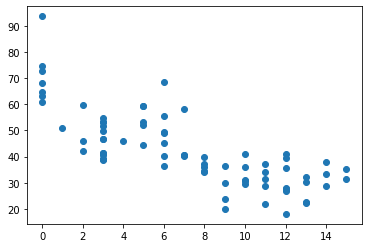

In [14]:
import matplotlib.pyplot as plt

cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace=True)
cereal2.reset_index(drop=True, inplace=True)

x = cereal2['sugars'].values
y = cereal2['rating'].values

plt.scatter(x, y)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
  x,
  y,
  test_size=0.3,
  random_state=1
)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


`PolynomialFeatures`로 2차 다항식 조건을 생성한 뒤 `fit_transform()` 메서드로 `x_poly` 데이터를 생성한다.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train.reshape(-1, 1))

In [17]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_poly, y_train)

LinearRegression()

In [18]:
import numpy as np

x_test_poly = poly_reg.transform(x_test.reshape(-1, 1))
pred = reg.predict(x_test_poly)

np.set_printoptions(precision=2)

print(
  np.concatenate(
    (
      pred.reshape(len(pred), 1),
      y_test.reshape(len(y_test), 1)
    )
  ),
  1
)

[[51.63]
 [32.1 ]
 [55.79]
 [31.08]
 [32.1 ]
 [44.46]
 [38.82]
 [41.45]
 [41.45]
 [31.38]
 [36.56]
 [34.7 ]
 [65.25]
 [33.21]
 [44.46]
 [38.82]
 [51.63]
 [36.56]
 [41.45]
 [31.04]
 [31.38]
 [31.5 ]
 [32.1 ]
 [46.66]
 [28.74]
 [59.64]
 [37.84]
 [31.44]
 [44.33]
 [40.4 ]
 [55.33]
 [49.12]
 [27.75]
 [34.38]
 [29.92]
 [63.01]
 [31.07]
 [52.08]
 [40.45]
 [53.13]
 [33.98]
 [49.51]
 [22.74]
 [39.26]
 [31.23]
 [21.87]] 1


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)

acc = reg.score(
  poly_reg.transform(x_test.reshape(-1, 1)),
  y_test
)

print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}%'.format(round(acc*100, 3)))

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	74.376%


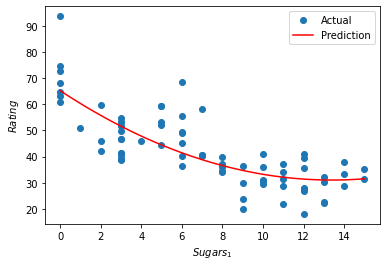

In [20]:
x_new = np.linspace(0, 15, 100).reshape(100, 1)
x_new_poly = poly_reg.transform(x_new)

y_new = reg.predict(x_new_poly)

plt.plot(x, y, 'o', label = 'Actual')
plt.plot(x_new, y_new, 'r-', label='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

**4. 코드 실습 2**

In [21]:
x = cereal.iloc[:,:-1].values
y = cereal.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(
  x,
  y,
  test_size=0.3,
  random_state=1
)

print(
  x_train.shape,
  x_test.shape,
  y_train.shape,
  y_test.shape
)

(53, 12) (23, 12) (53,) (23,)


In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

In [24]:
from sklearn.linear_model import LinearRegression

x_poly = poly_reg.fit_transform(x_train_scaled)

In [25]:
reg = LinearRegression()
reg.fit(x_poly, y_train)

LinearRegression()

In [26]:
import numpy as np

x_test_poly = poly_reg.transform(x_test_scaled)
pred = reg.predict(x_test_poly)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test_poly, y_test)

In [28]:
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc*100,3)))

MSE	10.108
MAE	2.215
RMSE	3.179
ACC	92.248%


## 제3절. 다중 회귀(Multiple Regression)
### 1. 다중 회귀 개념
- 다중 회귀분석은 다중의 독립변수가 있는 회귀분석을 말한다.
- 여러 개의 독립변수가 복합적으로 종속변수에 영향을 미치는 경우 다중 회귀 모형으로 데이터를 표현할 수 있다.
- 다중 회귀에서는 최적모델을 결정하기 위해 다양한 방법으로 변수를 선택한다.
- 모델이 복잡해지면 과대적합이 발생할 가능성이 있어 이를 방지하고자 다양한 규제를 적용해 모델의 가중치를 제한한다.

#### 1. 변수선택법
- 다중 선형 모델의 성능을 높이기 위해 독립변수의 부분집합을 선택하는 방법이 있다.
- 모델의 적합도를 개선하는 방식으로서 전진선택법과 후진선택법 등이 있다.

1. 규제가 있는 다항 회귀 모델
    - 변수선택법의 대안으로 계수추정치들을 제한하거나 규칙화하는 기법으로 p개의 독립변수를 모두 포함하는 모델을 적합할 수 있다.
    - 규칙에 따라 계수 추정치들을 0으로 축소하는 방식으로 다중 회귀 모델의 성능을 높인다.
    - 회귀계수들을 0으로 수축하기 위한 방식으로 가장 잘 알려진 것은 릿지(Ridge)와 라쏘(Lasso)이다.
      - 이 두 가지의 절충안으로 엘라스틱넷(Elastic Net)이 있다.
      
    **1. 릿지(Ridge)**
    - 릿지 회귀는 최소제곱 적합식의 수축 패널티라 불리는 항에 L2 패널티를 추가한 것이다.
      - $RidgeMSE(\beta)=\displaystyle MSE(\beta)+\alpha{1\over2}\sum_{i=1}^{n}{\beta_i^2}$
    - 수축 패널티는 $RidgeMSE$에서 2번째 항인 $\alpha{1\over2}\sum_{i=1}^{n}{\beta_i^2}$이다.
    - 이 항은 $\beta_1, ..., \beta_n$이 0에 가까울 때 작기 때문에 $\beta_i$의 추정치를 0으로 수축하는 효과를 준다.
    - 이 규제항은 데이터를 학습하는 동안에만 비용 함수에 추가되며 모델의 학습이 끝나면 수축 패널티의 규제가 없는 성능 지표로 모델의 예측성능을 평가한다.
    - 수축 패널티의 $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절하는 역할을 한다.
    - $\alpha=0$이면 패널티의 영향이 없어 릿지 회귀는 선형 회귀와 같아진다.
    - $\alpha$가 커질수록 수축 패널티의 영향이 커져 릿지 회귀계수 추정치는 0에 가까워지므로 데이터의 평균을 지나는 선을 만든다.
    - 릿지 회귀가 최소제곱법보다 나은 이유는 편향-분산 절충(bias-variance trade-off) 관점에서 살펴볼 수 있다.
    - $\alpha$가 증가하면 릿지 회귀 적합의 유연성이 줄어들어 편향은 증가하지만 분산은 감소한다.
    - 그러므로 학습데이터의 작은 변화에 회귀계수 추정치가 크게 변하는 문제를 극복할 수 있다.
    - 또한 릿지는 $2^p$개의 모델을 탐색해야 하는 변수선택법에 비해 계산이 빠르다는 장점도 가지고 있다.
    
    **scikit-learn의 Ridge**
    ```
    class sklearn.linear_model.Ridge(
      alpha=1.0,
      *,
      fit_intercept=True,
      normalize='deprecated',
      copy_X=True,
      max_iter=None,
      tol=0.001,
      solver='auto',
      positive=False,
      random_state=None
    )
    ```
    - 매개변수
      - `alpha` : 정규화 강도를 정하는 값이다. 알파값이 클 수록 정규화의 강도가 세진다. 양수의 부동 소수점이어야 한다.
      - `fit_intercept` : 선형 회귀 모델에 대한 절편을 계산할지 여부를 결정한다. False로 설정하면 절편을 사용하지 않는 모델로 계산한다.
      - `normalize` : True인 경우 X는 평균을 빼고 L2-norm으로 나누어 회귀 전에 정규화된다. 표준화를 진행하고 싶으면, `normalize=False`로 설정한 뒤 `fit()`을 호출하기 전에 `StandardScaler()`를 사용하면 된다.
      - `positive` : True로 하면 계수가 양수가 된다.
      - `copy_X` : True이면 X가 복사된다. False이면 덮어쓴다.
    - 속성
      - `coef_` : 선형 회귀 문제에 대한 추정된 계수이다. 대상이 두 개 이상이면 2차원 배열 `(n_targets, n_features)`이고, 대상이 하나면 1차원 배열인 `n_features`이다.
      - `intercept_` : 선형 모델의 독립항(절편)이다.
    - 메서드\
    대괄호 []안의 인자는 생략 가능
      - `fit(X, y[, sample_weight])` : 모델을 학습시킨다.
      - `get_params([deep])` : 선형 회귀 모델의 매개변수를 가져온다.
      - `predict(X)` : 선형 모델을 사용해 예측한다.
      - `score(X, y[, sample_weight])` : 예측의 결정계수를 반환한다.
    
    **코드 실습**
    - scikit-learn에서 제공하는 당뇨 데이터로 릿지 회귀를 수행하고 $\alpha$에 따라 회귀계수의 변화를 시각화해보자.

In [29]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes_load = load_diabetes()
x = pd.DataFrame(
  diabetes_load.data,
  columns=diabetes_load.feature_names
)
y = diabetes_load.target

x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [30]:
from sklearn.linear_model import Ridge
import numpy as np

alpha = np.logspace(-3, 1, 5)

data = []

for i, a in enumerate(alpha):
  ridge = Ridge(alpha=a)
  ridge.fit(x, y)
  data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(
  data,
  index=alpha
)
df_ridge.columns = x.columns

df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


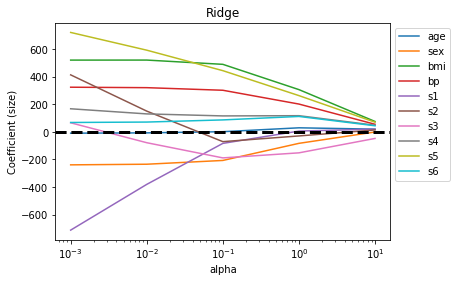

In [31]:
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)
# plt.xticks(
#   alpha,
#   labels=np.log10(alpha)
# )
plt.legend(
  labels=df_ridge.columns,
  bbox_to_anchor=(1, 1)
)
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(
  y = 0,
  linestyle='--',
  color='black',
  linewidth=3
)
plt.show()

- RidgeMSE를 사용한 회귀 모델과 MSE를 사용한 회귀 모델을 비교해보자.
- MSE를 사용한 회귀 모델은 $\alpha=0$일 때와 같은 효과를 지닌다.
- $\alpha$가 작은 릿지 회귀 모델의 회귀계수는 MSE를 사용한 회귀 모델의 계수와 비슷한 사이즈를 지닌다.
- $\alpha$값이 점점 증가하면서 회귀계수가 0에 가까워지는 것을 확인할 수 있다.

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

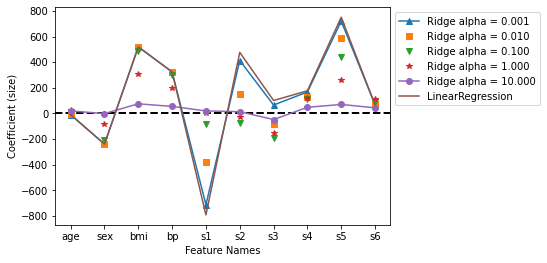

In [33]:
plt.axhline(
  y=0,
  linestyle='--',
  color='black',
  linewidth=2
)
plt.plot(df_ridge.loc[0.001], '^-', label='Ridge alpha = 0.001')
plt.plot(df_ridge.loc[0.010], 's', label='Ridge alpha = 0.010')
plt.plot(df_ridge.loc[0.100], 'v', label='Ridge alpha = 0.100')
plt.plot(df_ridge.loc[1.000], '*', label='Ridge alpha = 1.000')
plt.plot(df_ridge.loc[10.000], 'o-', label='Ridge alpha = 10.000')

plt.plot(lr.coef_, label='LinearRegression')

plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

**2. 라쏘(Lasso)**
- 라쏘 회귀는 최소제곱 적합식의 수축 패널티라 불리는 항에 L1 패널티를 추가한 것이다.
  - $LassoMSE(\beta)=\displaystyle MSE(\beta)+\alpha\sum_{i=1}^{n}{\vert\beta_i\vert}$
- 수축 패널티는 $LassoMSE$에서 2번째 항인 $\alpha\sum_{i=1}^{n}{\vert\beta_i\vert}$이다.
- 이 항은 $\beta_1, ..., \beta_n$이 0에 가까울 때 작기 떄문에 $\beta_i$의 추정치를 0으로 수축하는 효과를 준다.
- 다만, L1 패널티는 하이퍼파라미터 $\alpha$가 충분히 클 때, 계수 추정치들의 일부를 0이 되게 할 수 있다.
- 덜 중요한 특징은 특성의 가중치를 제거할 수 있다는 점에서 릿지 회귀와 차이를 보인다.
- 즉, 라쏘 회귀는 회소 모델(sparse model)을 만들 수 있다.
- 릿지 회귀의 문제점을 해결하기 위해 라쏘 회귀가 사용된다.
  - 릿지 회귀는 최종 모델에 p개의 변수를 모두 포함한다.
  - RidgeMSE의 수축 패널티 항은 모든 계수를 0으로 수렴시키지만 어떤 것도 0으로 만들지는 않는다.
  - 만약에 변수의 크기(p)가 매우 큰 데이터로 릿지 모델을 실행시킨다면, 결과를 해석하는 데 어려움이 발생할 가능성이 있다.
  
**scikit-learn의 Lasso**
```
class sklean.linear_model.Lasso(
  alpha=1.0,
  *,
  fit_intercept=True,
  normalize='deprecated',
  precompute=False,
  copy_X=True,
  max_iter=1000,
  tol=0.0001,
  warm_start=False,
  positive=False,
  random_state=None,
  selection='cyclic'
)
```
- 매개변수
  - `alpha` : L1 항을 곱하는 상수이다. 알파값이 0인 경우는 OLS 기반으로 선형 회귀를 푼 것과 동등한 결과를 도출한다.
  - `fit_intercept` : 선형 회귀 모델에 대한 절편을 계산할지 여부를 결정한다. False로 설정하면 절편을 사용하지 않는 모델로 계산한다.
  - `normalize` : True인 경우 X는 평균을 빼고 L2-norm으로 나누어 회귀 전에 정규화된다. 표준화를 진행하고 싶으면, `normalize=False`로 설정한 뒤 `fit()`을 호출하기 전에 `StandardScaler()`를 사용하면 된다.
  - `positive` : True로 하면 계수가 양수가 된다.
  - `copy_X` : True이면 X가 복사된다. False이면 덮어쓴다.
- 속성
  - `coef_` : 선형 회귀 문제에 대한 추정된 계수이다. 대상이 두 개 이상이면 2차원 배열 `(n_targets, n_features)`이고, 대상이 하나이면 길이가 `n_features`인 1차원 배열이다.
  - `intercept_` : 선형 모델의 독립항(절편)이다.
- 메서드\
대괄호 [] 안의 인자는 생략 가능하다.
  - `fit(X, y[, sample_weight])` : 모델을 학습시킨다.
  - `get_params([deep])` : 선형 회귀 모델의 매개변수를 가져온다.
  - `predict(X)` : 선형 모델을 사용해 예측한다.
  - `score(X, y[, sample_weight])` : 예측의 결정계수를 반환한다.

**코드 실습**
- $\alpha$값을 설정한 뒤 scikit-learn의 Lasso를 사용해 모델을 생성한 뒤 fit()으로 데이터를 학습시킨다.

In [34]:
from sklearn.linear_model import Lasso

alpha = np.logspace(-3, 1, 5)

data = []

for i, a in enumerate(alpha):
  lasso = Lasso(alpha=a)
  lasso.fit(x, y)
  data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(
  data,
  index=alpha
)
df_lasso.columns = x.columns

df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


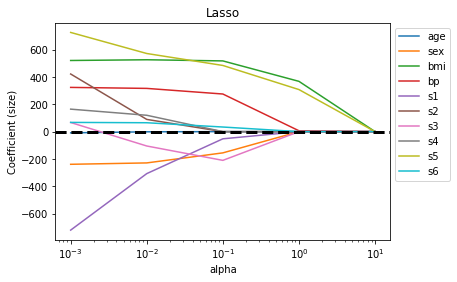

In [35]:
plt.semilogx(df_lasso)
# plt.xticks(
#   alpha,
#   labels=np.log10(alpha)
# )
plt.legend(
  labels=df_lasso.columns,
  bbox_to_anchor=(1, 1)
)
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(
  y=0,
  linestyle='--',
  color='black',
  linewidth=3
)
plt.show()

- LassoMSE를 사용한 회귀 모델과 MSE를 사용한 회귀 모델을 비교해보자.
- MSE를 사용한 회귀 모델은 $\alpha=0$일 때와 같은 효과를 지닌다.
- $\alpha$가 작은 라쏘 회귀 모델의 회귀계수는 MSE를 사용한 회귀 모델의 계수와 비슷한 사이즈를 지닌다.
- $\alpha$값이 점점 증가하면서 회귀계수가 0이 되는 것을 확인할 수 있다.
- 릿지 회귀는 $\alpha=10$일 때 회귀계수가 0에 가까운 형태를 보이지만 0은 아니었지만 라쏘 회귀는 $\alpha=10$일 때 회귀계수가 0이 된다.

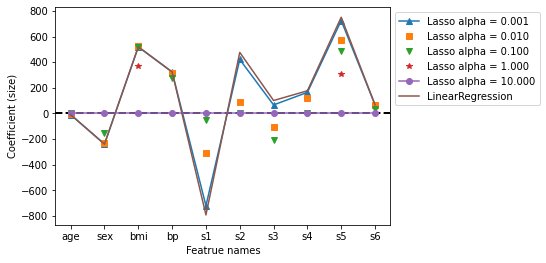

In [36]:
plt.axhline(
  y=0,
  linestyle='--',
  color='black',
  linewidth=2
)
plt.plot(df_lasso.loc[0.001], '^-', label='Lasso alpha = 0.001')
plt.plot(df_lasso.loc[0.010], 's', label='Lasso alpha = 0.010')
plt.plot(df_lasso.loc[0.100], 'v', label='Lasso alpha = 0.100')
plt.plot(df_lasso.loc[1.000], '*', label='Lasso alpha = 1.000')
plt.plot(df_lasso.loc[10.000], 'o-', label='Lasso alpha = 10.000')

plt.plot(lr.coef_, label='LinearRegression')

plt.xlabel('Featrue names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

**3. 엘라스틱넷(Elastic Net)**
- 엘라스틱넷은 릿지 회귀와 라쏘 회귀를 절충한 알고리즘이다.
- 수축 패널티는 릿지와 회귀의 규제항을 단순히 더한 것이며, 혼합비율 r을 사용해 조절한다.
  - $ElasticNetMSE(\beta)=\displaystyle MSE(\beta)+r\alpha\sum_{i=1}^{n}{\vert\beta_i\vert}+{1-r\over2}\alpha\sum_{i=1}^{n}{\beta^2}$
- $r=0$이면 릿지 회귀의 효과를 발휘하고, $r=1$이면 라쏘 회귀와 같다.

**scikit-learn의 ElasticNet**
```
class sklearn.linear_model.ElasticNet(
  alpha=1.0,
  *,
  l1_ratio=0.5,
  fit_intercept=True,
  normalize='deprecated',
  precompute=False,
  max_iter=1000,
  copy_X=True,
  tol=0.0001,
  warm_start=False,
  positive=False,
  random_state=None,
  selection='cyclic'
)
```
- 매개변수
  - `alpha` : 패널티 항을 곱하는 상수이다. 알파값이 0인 경우는 OLS 기반으로 선형 회귀를 푼 것과 동등한 결과를 도출한다.
  - `l1_ratio` : 엘라스틱넷의 혼합정도를 결정하는 파라미터이다. l1 ratio가 0과 1사이의 값일 경우, L1과 L2 규제를 혼합한 것이다. 0인경우 L2, 1인 경우 L1 규제를 적용한 것이다.
  - `fit_intercept` : 선형 회귀 모델에 대한 절편을 계산할지 여부를 결정한다. False로 설정하면 절편을 사용하지 않는 모델로 계산한다.
  - `normalize` : True인 경우 X는 평균을 빼고 L2-norm으로 나누어 회귀 전에 정규화된다. 표준화를 진행하고 싶으면, `normalize=False`로 설정한 뒤 `fit()`을 호출하기 전에 `StandardScaler()`를 사용하면 된다.
  - `positive` : True로 하면 계수가 양수가 된다.
  - `copy_X` : True이면 X가 복사된다. False이면 덮어쓴다.
- 속성
  - `coef_` : 선형 회귀 문제에 대한 추정된 계수이다. 대상이 두 개 이상이면 2차원 배열 `(n_targets, n_features)`이고, 대상이 하나이면 길이가 `n_features`인 1차원 배열이다.
  - `intercept_` : 선형 모델의 독립항(절편)이다.
- 메서드\
대괄호 [] 안의 인자는 생략 가능하다.
  - `fit(X, y[, sample_weight])` : 모델을 학습시킨다.
  - `get_params([deep])` : 선형 회귀 모델의 매개변수를 가져온다.
  - `predict(X)` : 선형 모델을 사용해 예측한다.
  - `score(X, y[, sample_weight])` : 예측의 결정계수를 반환한다.

**코드 실습**
- $\alpha$값을 설정한 뒤 scikit-learn의 ElasticNet으로 모델을 생서한 뒤 `fit()`으로 데이터를 학습시킨다.
- 이때 엘라스틱넷 비율($r$)은 0.5로 설정했다.

In [37]:
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3, 1, 5)

data = []

for i, a in enumerate(alpha):
  ela = ElasticNet(alpha=a, l1_ratio=0.5)
  ela.fit(x, y)
  data.append(pd.Series(np.hstack([ela.coef_])))

df_ela = pd.DataFrame(data, index=alpha)
df_ela.columns = x.columns

df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


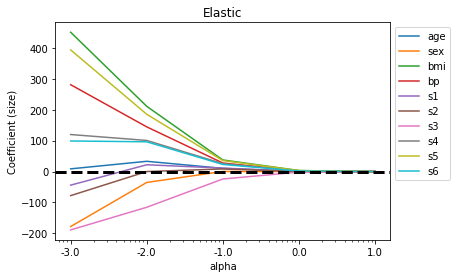

In [38]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1, 1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(
  y=0,
  linestyle='--',
  color='black',
  linewidth=3
)
plt.show()

- ElasticNet을 사용한 회귀 모델과 MSE를 사용한 회귀 모델을 비교해보자.
- MSE를 사용한 회귀 모델은 $\alpha=0$일 때와 같은 효과를 지닌다.
- $\alpha$가 작은 엘라스틱넷 회귀 모델의 회귀계수는 MSE를 상요한 회귀 모델의 계수와 비슷한 사이즈를 지닌다.
- $\alpha$값이 점점 증가하면서 회귀계수가 0이 되는 것을 확인할 수 있다.
- 엘라스틱넷 회귀는 $\alpha=10$일 때 회귀계수가 0이 된다.

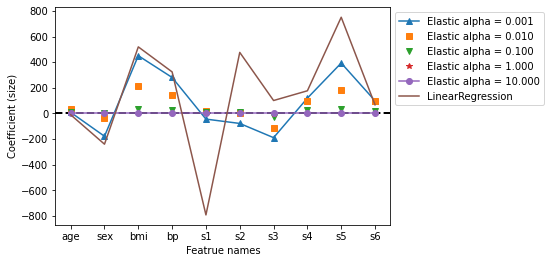

In [39]:
plt.axhline(
  y=0,
  linestyle='--',
  color='black',
  linewidth=2
)
plt.plot(df_ela.loc[0.001], '^-', label='Elastic alpha = 0.001')
plt.plot(df_ela.loc[0.010], 's', label='Elastic alpha = 0.010')
plt.plot(df_ela.loc[0.100], 'v', label='Elastic alpha = 0.100')
plt.plot(df_ela.loc[1.000], '*', label='Elastic alpha = 1.000')
plt.plot(df_ela.loc[10.000], 'o-', label='Elastic alpha = 10.000')

plt.plot(lr.coef_, label='LinearRegression')

plt.xlabel('Featrue names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

## 제4절. 로지스틱 회귀(Logistic Regression)
### 1. 개념
- 선형 모델을 분류에 사용해 샘플이 특정 클래스에 속할 확률을 추정하는데 사용할 수 있따.
- 반응변수가 범주형인 경우에 적용하는 회귀분석을 로지스틱 회귀분석이라 한다.
- 로지스틱 회귀분석은 반응변수 Y를 직접 모델링하지 않고, Y가 특정 범주에 속하는 확률을 모델링한다.

#### 1. p(X)와 X 사이의 모델링
- 로지스틱 회귀는 선형 회귀 모델처럼 독립변수의 가중치 합으로 계산해 P(X)와 X 사이의 관계를 나타낸다.
- 다만, 특정 범주에 속하는 확률인 로지스틱 회귀를 선형 회귀 모델처럼 P(X)를 $P(X)=\beta_0+\beta_1X$로 표현하는 것은 예측에 맞지 않는다.
- 그러므로 $P(X)=Pr(Y=1|X)$와 $X$ 사이의 관계를 모델링할 때 새로운 접근이 필요하다.
- 즉, 모든 x값에 대해 0에서 1사이의 값을 제공하는 함수를 사용해야 한다.
- X가 아주 큰 음수일 때 0이 되고 X가 아주 큰 양수일 때 1이 되도록 바꾸려면 시그모이드 함수(또는 로지스틱 함수)를 사용해야 한다.
  - $Y=\displaystyle{1\over1+e^{-X}}$

#### 2. 승산비(Odds)
- Odds는 '실패에 비해 성공할 확률'을 의미한다.
- Odds는 $p/(1-p)$로 계산한다.
- $P(Y=1|X)$ 확률값이 1에 가까워질수록 Odds가 무한대로 발산하기 때문에 범위에 제약이 있다.
- 범위의 한계를 극복하기 위해 Odds에 로그 함수를 취하게 된다.
- 그러면 $log(Odds)$는 범위가 $-\infin < log(Odds) < \infin$로 바뀐다.
- 또한 X가 음수일 때는 Y가 0에서 0.5 이하인 값을, X가 양수일 땐 Y가 0.5 이상이면서 1 이하인 값을 반환하게 된다.
- 즉, 성공확률 0.5를 기준으로 X값이 나뉘게 되는 것이다.
- 이러한 장점을 활용해 설명변수에 로짓반응을 적용해서 모델링하는 것이 로지스틱 회귀 모델이다.
  - $log(Odds)=\displaystyle log({P(X)\over1-P(X)})=\beta_0+\beta_1X$
- 양변에 로그를 지우면 설명변수로 승산비를 표현할 수 있다.
  - $Odds=\displaystyle{P(X)\over1-P(X)}=e^{\beta_0+\beta_1X}$
- 성공확률 $P(X)$를 설명변수에 대한 식으로 다음과 같이 표현할 수 있다.
  - $P(X)=\displaystyle{1\over1+e^{-(\beta_0+\beta_1X)}}$
- 이 과정을 통해 로지스틱 회귀 모델은 설명변수 X에 대해 선형적인 로짓을 가진다고 말할 수 있다.
- 선형 회귀 모델에서 $\beta_1$의 한 유닛 증가와 관련되 Y의 평균 변화를 제공했던 것처럼, 로지스틱 회귀 모델에서 X의 한 유닛 증가는 로그 공산을 $\beta_1$만큼 변화시킨다.
- 승산비에 $e^{\beta_1}$을 곱하는 것과 같다.
- $P(X)$와 X의 관계가 직선이 아니므로, $\beta_1$은 X의 한 유닛 증가와 관련된 $P(X)$의 변화와 일치하지는 않는다.
- 결론적으로 X에 속할수록 Y를 할 확률이 $e^{\beta_1}$배 증가한다.

#### 3. 훈련 및 비용 함수
- 로지스틱 회귀 모델의 데이터 학습 목적은 양성 샘플($y=1$)에 대해서는 높은 확률을 추정하고 음성 샘플($y=0$)에 대해서는 낮은 확률을 추정하는 모델의 파라미터를 찾는 것이다.
- $P(X)$의 회귀계수가 알려져 있지 않기 때문에 학습데이터에 기초해 회귀계수를 추정해야 하기 때문이다.
- 이 목적을 달성하기 위해 최대 우도 추정법(MLE; Maximum Likelihood Estimation)을 사용한다.
- 최대 우도 추정법은 확률 모형의 모수 추정에서 일반적으로 사용하는 방식이다.
- 회귀계수를 모르는 상태에서는 베이즈 규칙을 활용해 우도(Likelihood)를 추정해볼 수 있다.
- 즉, 이미 주어진 표본 x들에 비우처 모집단의 모수에 대한 추정을 하는 것이다.
- 성공을 1, 실패를 0으로 대응시켰을 때 두 가지 결과만을 가지게 되는 베르누이 확률분포를 활용할 수 있다.
- 베르누이 확률변수 Y에 관한 우도 함수를 활용해 회귀계수를 추정하는 식을 만들 수 있다.
  - $l(\beta_0, \beta_1)=\displaystyle\prod_{i:y_i=1}{P(x_i)}\prod_{i':y_{i'}=0}{(1-P(x_{i'}))}$
- 우도 함수를 최대화되도록 $l(\beta_0, \beta_1)$를 미분한 것이 최소가 되는 값을 찾으면 된다.
- 하지만 정규방정식 같은 것이 없어 다른 방식으로 최적해를 찾는다.
- 경사하강법 또는 Newton-Rapson 방식으로 최적화 알고리즘에 따라 해를 구한다.

**scikit-learn의 LogisticRegression**
```
class sklearn.linear_model.LogisticRegression(
  penalty='l2',
  *,
  dual=False,
  tol=0.0001,
  C=1.0,
  fit_intercept=True,
  intercept_scaling=1,
  class_weight=None,
  random_state=None,
  solver='lbfgs',
  max_iter=100,
  multi_class='auto',
  verbose=0,
  warm_start=False,
  n_jobs=None,
  l1_ratio=None
)
```
- 매개변수
  - `penalty` : 패널티에 적용할 노름(norm)을 결정한다. `'none'`은 패널티를 적용하지 않는 것이다. `'l2'`, `'l1'`, `'elasticnet'`은 각각 해당하는 패널티를 적용한다.
  - `dual` : Dual formulation의 실행여부를 결정한다. `n_sample`이 `n_feature`보다 크다면 False 값을 추천한다.
  - `tol` : 중지 기준에 대한 허용 오차이다.
  - `c` : 정규화 강도의 역수이다.
  - `fit_intercept` : bias 또는 절편을 추가해야 하는지 여부를 결정한다.
  - `class_weight` : 클래스와 관련된 가중치이다. 지정하지 않으면 모든 클래스의 가중치가 1이 된다.
  - `random_state` : `solver`가 `'sag'`, `'saga'`, `'liblinear'`일 때 사용된다.
  - `solver` : 최적화 문제를 푸는 해를 구할 때 사용할 알고리즘을 정하는 것이다. 데이터세트의 크기가 작으면 `'liblinear'`가 좋다고 알려저 있다. 다중 클래스 문제에서는 `'newton-cg'`, `'sag'`, `'saga'`, 그리고 `'lbfgs'`를 사용한다.
  - `multi_class` : 클래스 타입을 설정하는 것이다. `'auto'`는 자동으로 설정하는 것이고, `'ovr'`는 binary 문제에 해당한다. `'multinomial'`은 다중 클래스 문제에서 선택한다.
  - `verbose` : liblinear와 lbfgs에서 자세한 설명을 확인하기 위해 verbose를 양수로 설정한다.
  - `l1_ratio` : `penalty`가 `'elasticnet'`일 경우에만 사용한다. 0일 경우 L2 패널티, 1일 경우 L1 패널티에 상응한다.
- 속성
  - `classes_` : 분류기에서 라벨링된 클래스이다.
  - `coef_` : feature에 할당된 가중치이다.
  - `intercept_` : 선형 모델의 독립항(절편)이다.
  - `n_iter` : 중지 기준에 도달하기 전의 실제 반복 횟수이다.
- 메서드\
대괄호 [] 안의 인자는 생략 가능하다.
  - `decision_function` : 분류자가 샘플데이터 X에 대해 예측한 y값이 Hyperplane의 오른쪽(양수)/왼쪽(음수)에 있는지 여부와 이 것이 Hyperplane에서 얼마나 멀리 떨어져 있는지를 나타낸다. 또한 모델이 샘플데이터 X에 대해 예측한 y값이 얼마나 확실하게 양수 또는 음수의 값인지 알려준다.
- `fit(X, y)` : 모델을 학습시킨다.
- `get_params([deep])` : 모델의 매개변수를 가져온다.
- `predict(X)` : 로지스틱 회귀 모델을 사용해 예측한다.
- `predict_log_proba(X)` : 확률 추정의 로그를 예측한다.
- `predict_proba(X)` : 확률을 추정한다.
- `score(X, y[, sample_weight])` : 예측의 평균 정확도(Accuracy)를 반환한다.

**코드 구현**
- 캐글의 bodyPerformance 데이터를 사용해 로지스틱 회귀 모델을 구현해보자. 먼저 캐글에 접속해 데이터를 다운받고 read한다(www.kaggle.com/kukuroo3/body-performance-data).

In [40]:
import pandas as pd
import numpy as np
# import warnings

# warnings.filterwanrings('ignore')

body = pd.read_csv('./datasets/bodyPerformance.csv')

body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [41]:
body['gender'] = np.where(body['gender'] == 'M', 0, 1)
body['class_1'] = np.where(body['class'] == 'A', 1, 0)

body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [42]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_1']))
x = body[feature_columns]
y = body['class_1']

train_x, test_x, train_y, test_y = train_test_split(
  x,
  y,
  stratify=y,
  train_size=0.7,
  random_state=1
)

print(
  train_x.shape,
  test_x.shape,
  train_y.shape,
  test_y.shape
)

(9375, 11) (4018, 11) (9375,) (4018,)


In [43]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)

c:\Users\Bob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
proba = pd.DataFrame(log_reg.predict_proba(train_x))

cs = log_reg.decision_function(train_x)

df = pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns = ['Not_A', 'A', 'decision_function']

df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)

df

,Not_A,A,decision_function
0,1.000000,2.665260e-08,-17.440379
1,1.000000,1.005425e-07,-16.112686
2,1.000000,1.084515e-07,-16.036962
3,1.000000,1.190615e-07,-15.943626
4,1.000000,1.754486e-07,-15.555920
...,...,...,...
9370,0.002310,9.976905e-01,6.068408
9371,0.002160,9.978402e-01,6.135591
9372,0.002108,9.978925e-01,6.160130
9373,0.001072,9.989282e-01,6.837304


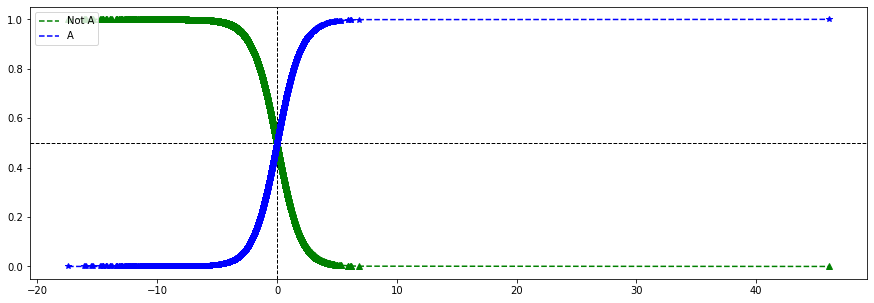

In [45]:
plt.figure(figsize=(15, 5))

plt.axhline(
  y=0.5,
  linestyle='--',
  color='black',
  linewidth=1
)
plt.axvline(
  x=0,
  linestyle='--',
  color='black',
  linewidth=1
)

plt.plot(df['decision_function'], df['Not_A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not_A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.legend(loc='upper left')
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = log_reg.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[2767  247]
 [ 349  655]]

정확도	85.17%
정밀도	72.62%
재현율	65.24%
F1	68.73%


c:\Users\Bob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


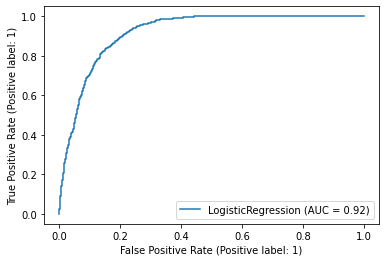

In [47]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(log_reg, test_x, test_y)
plt.show()

### 2. 다중 클래스 분류 - 소프트맥스 회귀
#### 1. 개념
- 로지스틱 회귀 모델은 2개 이상의 클래스인 다중 클래스를 지원하도록 일반화할 수 있다.
- 이 과정을 다항 로지스틱 회귀(Multinomial Logistic Regression) 또는 소프트맥스 회귀(Softmax Regression)이라고 한다.
- 소프트맥스 함수는 클래스의 총 개수를 k개라고 할 때 k차원의 벡터를 입력받아 각 클래스에 대한 점수 $S_{k}(X)$를 계산하고, 그 점수에 소프트맥스 함수를 적용해 각 클래스의 확률을 추정한다.
- k차원의 벡터에서 i번째 클래스가 정답일 확률을 $\hat p_k$라고 하면 다음과 같이 나타낼 수 있다.
  - $\hat p_k=\sigma(S(X))_k=\displaystyle{\exp(S_k(X))\over\displaystyle\sum_{i=1}^{K}\exp(S_i(X))}$

#### 2. scikit_learn의 LogisticRegression의 매개변수를 활용한 소프트맥스 회귀
- `LogisticRegression`의 `multi_class` 매개변수를 `'multinomial'`로 바꾸면 소프트맥스 회귀를 사용할 수 있다.
- `solver` 매개변수에 소프트맥스 회귀를 적용할 수 있는 `'lbfgs'`와 같은 알고리즘을 설정해야 한다.

In [48]:
body = pd.read_csv('./datasets/bodyPerformance.csv')

body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [49]:
body['gender'] = np.where(body['gender'] == 'M', 0, 1)
mapping = {
  'A':0,
  'B':1,
  'C':2,
  'D':3
}
body['class_2'] = body['class'].map(mapping)

body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,3


In [50]:
feature_columns = list(body.columns.difference(['class', 'class_2']))
x = body[feature_columns]
y = body['class_2']

train_x, test_x, train_y, test_y = train_test_split(
  x,
  y,
  stratify=y,
  train_size=0.7,
  random_state=1
)

print(
  train_x.shape,
  test_x.shape,
  train_y.shape,
  test_y.shape
)

(9375, 11) (4018, 11) (9375,) (4018,)


In [51]:
from sklearn.linear_model import LogisticRegression

sm_reg = LogisticRegression(
  multi_class='multinomial',
  solver='lbfgs',
  C=10
)
sm_reg.fit(train_x, train_y)

c:\Users\Bob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = sm_reg.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)

print(test_cm)
print('')
print('정확도\t{}%'.format(round(test_acc*100,2)))

[[707 261  36   0]
 [269 403 300  32]
 [ 92 207 525 181]
 [ 13  63 157 772]]

정확도	59.91%


- `predict` 메서드는 데이터 샘플 X를 입력받아 해당 데이터 샘플이 속할 클래스를 반환하고, `predict_proba`는 각 클래스의 확률을 반환한다.
- `test_x`의 마지막 행 데이터를 `predict` 메서드에 입력하면 클래스 '0'에 속할 것으로 예측했다.
- 실제로 해당 데이터는 클래스 '0'인 B에 속한다는 것을 알 수 있다.

In [53]:
sm_reg.predict([test_x.iloc[-1,:]])

c:\Users\Bob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [54]:
sm_reg.predict_proba([test_x.iloc[-1,:]])

c:\Users\Bob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.63, 0.31, 0.06, 0.  ]])

## 제5절. 서포트 벡터 머신(Support Vector Machine)
### 1. 개념
- 서포트 벡터 머신(SVM; Support Vector Machine)은 새로운 데이터가 입력되었을 때 기존 데이터를 활용해 분류하는 방법이다.
- 패턴인식, 자료분석 등을 위한 지도학습 모델로 회귀와 분류 문제 해결에 사용되는 알고리즘이다.
- SVM은 최대 마진 분류기라고 불리는 단순한 분류기를 일반화한 것이며, 이러한 최대 마진 분류기의 단점을 극복하고 확장성을 넓힌 것이 서포트 벡터 분류기이다.
- 또 SVC를 더 확장하고 비선형 클래스 경계를 수용하기 위해 SVM이 고안되었다.

#### 1. 최대 마진 분류기(Maximal Margin Classifier)
- 최대 마진 분류기를 이해하려면 초평면(Hyperplane)에 대한 개념을 먼저 정의해야 한다.
- 초편면은 p차원 공간에서 차원이 (p-1)인 평평한 아핀(affine) 부분공간이다.
- 예를 들어 2차원 공간에서는 1차원 부분공간인 선이 초평면이고, 3차원 공간에서는 2차원 부분공간인 평면이 초평면이 된다.
- p차원의 초평면은 수학적으로 아래와 같이 정의할 수 있다.
  - $\beta_0+\beta_1X_1+...+\beta_pX_p=0$
- p차원 공간의 점 $X=(X_1, X_2, ..., X_p)^T$가 위의 식을 만족하면 점 X는 초평면상에 있다.
- 초평면의 위와 아래에도 각각의 영역이 존재하고, 관측값은 이 두 영역 중 하나에 속할 것이다.
- 각각의 영역을 수학적으로 나타내면 아래와 같다.
  - $\beta_0+\beta_1X_1+...+\beta_pX_p>0$
  - $\beta_0+\beta_1X_1+...+\beta_pX_p<0$
- 다만 데이터를 두 공간으로 나눌 수 있는 초평면은 무한 개가 있다.
- 데이터를 두 공간으로 나누는 분리 초평면을 기반으로 무한 개의 초평면 중 어느 것을 최종적으로 사용할지 결정해야 한다.
- 이때 마진(Margin)의 개념을 활용해야 한다.
- 즉, 관측치들에서 초평면까지 가장 짧은 거리인 마진(Margin)이 가장 큰 분리 초평면을 찾는다.
- 그리고 양의 초평면과 음의 초평면에 접한 관측값들을 '서포트 벡터'라 한다.
- 다시 말해, 서포트 벡터는 초평면에 가장 가까이에 붙어있는 최전방 데이터이다.
- 최대 마진 초평면은 다음과 같은 최적화 문제에 대한 해답을 찾는다.
  - 목적 함수 : $maximizeM$
  - 조건 1 : $\sum_{i=1}^{n}{\beta_j^2}=1$의 조건을 만족
  - 조건 2 : $y_1(\beta_0+\beta_1X_1+...+\beta_nX_n)\ge M\forall i=1, .., n$

#### 2. 서포트 벡터 분류기(SVC; Support Vector Classifier)
- 모든 데이터가 초평면에 의해 두 영역으로 분류될 수 있는 것이 아니기 때문에, 최대 마진 분류기는 모든 데이터에 적용하기 어렵다는 단점이 있다.
- 또한 분리 초평면에 의해 데이터 클래스를 나누면 학습데이터를 완벽하게 분류하기 때문에 과적합의 문제와 테스트데이터의 이상치에 민감할 수 있다는 문제도 있다.
- 그러므로 이상치로부터 영향을 덜 받으면서도 대부분의 학습데이터를 잘 분류할 수 있는 방식이 필요했다.
- 이를 위해 서포트 벡터 분류기는 최대 마진 분류기를 가지면서도 일부 관측치들이 마진이나 초평면의 반대쪽에 있는 것을 허용한다.
- SVC는 오차항을 수용하기 위해 제약조건을 아래와 같이 허용한다.
  - 목적 함수 : $maximizeM$
  - 조건 1 : $\sum_{i=1}^{n}{\beta_j^2}=1$의 조건을 만족
  - 조건 2 : $y_1(\beta_0+\beta_1X_1+...+\beta_nX_n)\ge M\forall i=1, .., n$
  - 조건 3 : $\epsilon\ge0$, $\sum_{i=1}^{n}{\epsilon_i}\le C$
- 조건 3의 C는 오차를 튜닝하는 하이퍼파라미터이다.
- C의 크기에 따라 오차 허용도가 달라진다.
- $C=0$이면 마진을 위반할 이유가 없으므로 최대 마진 초평면의 최적화 문제와 같은 조건이 된다.
- 만약 $C>0$이면 C 이하의 관측치들이 초평면의 반대쪽에 존재하는 것을 허용한다.
- 그러므로 C가 증가하면 모델을 더 유연하게 만들어 마진 위반에 대한 허용도가 커진다.
- 반면에 C값이 작아지면 마진 위반에 대한 허용도를 줄인다.

#### 3. 서포트 벡터 머신(SVM; Support Vector Machine)
- SVC는 데이터 클래스가 두 영역으로 나뉘고 그 사이의 경계가 선형인 경우에 적용할 수 있는 분류 기법이다.
- 하지만 모든 데이터가 선형으로 영역이 나뉠 수 있는 것은 아니다.
- 클래스의 경계가 비선형인 상황에서는 SVC의 개념을 확장하고 커널(Kernel)을 활용해 서포트 벡터 머신을 사용하면 된다.
- 커널이란 두 관측치들의 유사성을 수량화하는 함수를 말한다.
- 예를 들어 2차원에서는 선형 분리가 가능하지 않았던 데이터를 3차원 다항 커널로 전환했을 때 선형 분리가 가능한 경우가 있다.

#### 4. 서포트 벡터 회귀(SVR; Support Vector Regression)
- SVM의 작동 원리는 분류 과제뿐만 아니라 회귀분석에서도 사용할 수 있다.
- 서포트 벡터 회귀는 SVM의 개념을 활용한 회귀분석 모델이다.
- 다만, 분류기에서의 목표를 반대로 적용한다.
- SVM 분류기는 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 최대가 되도록 했지만, SVR은 아래 그림처럼 제한된 마진 오류 안에서 도로 안에 가능한 많은 데이터 샘플이 들어가도록 학습한다.
- 이때, 마진 오류는 도로 밖의 데이터 샘플을 의미한다.
- SVR에서 사용하는 손실 함수 중 가장 대표적인 것은 epsilon-insensitive 함수이다.
- epsilon-insensitive 함수를 사용한 SVR 식은 다음과 같다.
  - $L_{SVR}=\min{1\over2}||w||^2+C\sum_{i=1}^{n}{(\zeta_i+\zeta_i^*)}$
  - $s.t.(x^Tx_i+b)-y_i\le\epsilon+\zeta_i$\
    $y_i-(w^Tx_i+b)\le\epsilon+\zeta_i^*$\
    $\zeta_i\zeta_i^*\ge0$
- 수식에 사용된 하이퍼파라미터에 대한 설명은 다음과 같다.
- C(Cost)는 비용을 의미하며 패널티항을 통해 규제의 정도를 결정짓는다.
- C는 작아질수록 잘못 예측한 값에 대해 패널티를 부여하기 때문에 C가 작아질수록 회귀식이 평평해진다.
- $\epsilon$은 회귀식 위아래로 허용하는 노이즈의 정도이다.
- $\epsilon$가 클수록 허용 노이즈가 많아진다.
- $\zeta$는 회귀식 위쪽에서, 도로의 폭에서 벗어난 거리이며 $\zeta^*$는 회귀식의 아래쪽에서 도로의 폭을 벗어난 거리이다.

### 2. scikit-learn의 LinearSVC
```
class sklearn.svm.SVC(
  *,
  C=1.0,
  kernel='rbf',
  degree=3,
  gamma='scale',
  coef0=0.0,
  shrinking=True,
  probability=False,
  tol=0.001,
  cache_size=200,
  class_weight=None,
  verbose=False,
  max_iter=-1,
  decision_function_shape='ovr',
  break_ties=False,
  random_state=None
)
```
- 매개변수
  - `C` : 정규화 파라미터이다. 정규화의 강도는 C에 반비례하며, C값은 반드시 양수여야 한다.
  - `kernel` : 커널 함수의 타입을 고르는 것이다. `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`, `'precomputed'` 중 고를 수 있다.
  - `degree` : 커널 함수를 `'poly'`로 선택했을 때 다항 함수의 차수를 결정하는 것이다.
  - `gamma` : 커널 함수가 `'rbf'`, `'poly'`, `'sigmoid'`일 때 커널의 계수를 의미한다. `gamma` 값을 디폴트인 `'scale'`로 설정할 경우 `1/(n_features*X.var())`를 사용한다. `'auto'`인 경우 `1/n_features`를 사용한다.
  - `coef()` : 커널 함수를 `'poly'` 또는 `'sigmoid'`로 선택했을 때, 커널 함수의 독립항을 지정하는 것이다.
  - `tol` : 중지 기준이다.
  - `class_weight` : 각 클래스에서 매개변수 C에 대해 `{class_weight[i]*C}`로 가중치를 부여한다. 지정하지 않으면 모든 클래스에 대해 가중치를 1로 적용한다.
  - `verbose` : 자세한 정보 수준을 나타낸다.
  - `max_iter` : 최대 실행 반복 횟수이다.
  - `decision_function_shape` : `'ovo'` 또는 `'ovr'`을 선택할 수 있다. one-vs-rest 방식은 `ovr`이며, one-vs-one 방식은 `ovo`이다.
  - `random_state` : 데이터를 섞기 위한 pseudo 난수 생성을 제어한다.
- 속성
  - `class_weight_` : 각 클래스에 대한 파라미터 C의 승수이다.
  - `coef_` : `kernel='linear'`일 때, 변수에 할당된 가중치이다.
  - `dual_coef_` : 결정 함수에서 서포트 벡터에 대한 이중 계수이다.
  - `intercept_` : Decision Function의 상수이다.
  - `support_vectors_` : 서포트 벡터들을 나타낸다.
  - `support_` : 서포트 벡터의 인덱스이다.
  - `n_support_` : 각 클래스에 대한 서포트 벡터의 개수이다.
- 메서드\
대괄호 [] 안의 인자는 생략 가능하다.
  - `decision_function(X)` : 데이터 샘플의 Confidence Score를 반환한다.
  - `fit(X, y[, sample_weight])` : 모델을 학습시킨다.
  - `get_params([deep])` : 모델의 매개변수를 가져온다.
  - `predict(X)` : SVM 분류 모델을 사용해 예측한다.
  - `predict_log_proba(X)` : 확률 추정의 로그를 예측한다.
  - `predict_proba(X)` : 확률을 추정한다.
  - `score(X, y[,sample_weight])` : 예측의 평균 정확도(Accuracy)를 반환한다.
  
**코드 실습**
  - 캐글의 classification 데이터로 svm 모델을 학습해보자.
  - 먼저 데이터를 불러오자(www.kaggle.com/sveneschlbeck/beginners-classification-dataset).

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cls = pd.read_csv('./datasets/classification.csv')

cls

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


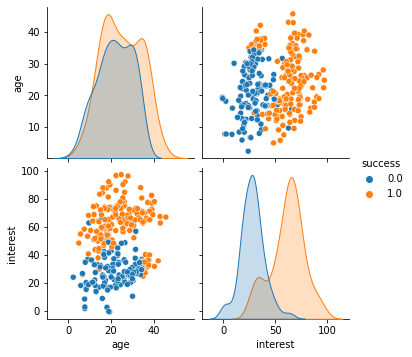

In [56]:
sns.pairplot(hue='success', data=cls)

In [57]:
from sklearn.model_selection import train_test_split

x = cls[['age', 'interest']]
y = cls['success']

train_x, test_x, train_y, test_y = train_test_split(
  x,
  y,
  stratify=y,
  train_size=0.7,
  random_state=1
)

print(
  train_x.shape,
  test_x.shape,
  train_y.shape,
  test_y.shape
)

(207, 2) (90, 2) (207,) (90,)


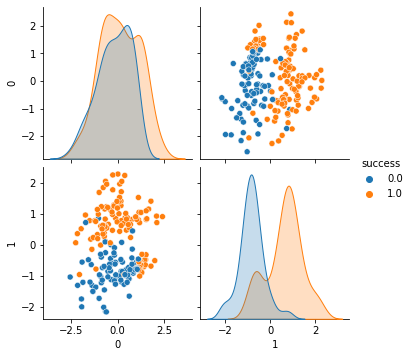

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)

sns.pairplot(
  data=pd.concat(
    [
      pd.DataFrame(train_x_scaled),
      train_y.reset_index(drop=True)
    ],
    axis=1
  ),
  hue='success'
)

In [59]:
from sklearn.svm import SVC

svc = SVC(C=0.5)
svc.fit(train_x_scaled, train_y)

SVC(C=0.5)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_x_scaled = scaler.transform(test_x)

pred = svc.predict(test_x_scaled)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('')
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[37  2]
 [ 2 49]]

정확도	95.56%
정밀도	96.08%
재현율	96.08%
F1	96.08%


c:\Users\Bob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


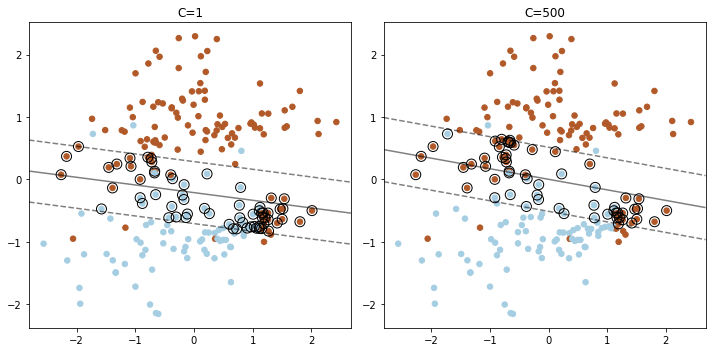

In [61]:
from sklearn.svm import LinearSVC

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 500]):
  li_svc = LinearSVC(
    C=C,
    loss='hinge',
    random_state=42
  ).fit(
    train_x_scaled,
    train_y
  )
  decision_function = li_svc.decision_function(train_x_scaled)
  support_vector_indices = np.where(
    np.abs(decision_function) <= 1 + 1e-15
  )[0]
  support_vectors = train_x_scaled[support_vector_indices]

  plt.subplot(1, 2, i+1)
  plt.scatter(
    train_x_scaled[:, 0],
    train_x_scaled[:, 1],
    c=train_y,
    s=30,
    cmap=plt.cm.Paired
  )
  ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  xx, yy = np.meshgrid(
    np.linspace(
      xlim[0],
      xlim[1],
      50
    ),
    np.linspace(
      ylim[0],
      ylim[1],
      50
    )
  )
  Z = li_svc.decision_function(
    np.c_[xx.ravel(), yy.ravel()]
  )
  Z = Z.reshape(xx.shape)

  plt.contour(
    xx,
    yy,
    Z,
    colors='k',
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=['--', '-', '--']
  )
  plt.scatter(
    support_vectors[:, 0],
    support_vectors[:, 1],
    s=100,
    linewidth=1,
    facecolors='none',
    edgecolors='k'
  )
  plt.title('C=' + str(C))
plt.tight_layout()
plt.show()

### 3. scikit-learn의 SVR
```
class sklearn.svm.SVR(
  *,
  kernel='rbf',
  degree=3,
  gamma='scale',
  coef0=0.0,
  tol=0.001,
  C=1.0,
  epsilon=0.1,
  shrinking=True,
  cache_size=200,
  verbose=False,
  max_iter=-1
)
```
- 매개변수
  - `C` : 정규화 파라미터이다. 정규화의 강도는 C에 반비례하며, C값은 반드시 양수여야 한다.
  - `kernel` : 커널 함수의 타입을 고르는 것이다. `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`, `'precomputed'` 중 고를 수 있다.
  - `degree` : 커널 함수를 `'poly'`로 선택했을 때 다항 함수의 차수를 결정하는 것이다.
  - `gamma` : 커널 함수가 `'rbf'`, `'poly'`, `'sigmoid'`일 때 커널의 계수를 의미한다. `gamma` 값을 디폴트인 `'scale'`로 설정할 경우 `1/(n_features*X.var())`를 사용한다. `'auto'`인 경우 `1/n_features`를 사용한다.
  - `coef()` : 커널 함수를 `'poly'` 또는 `'sigmoid'`로 선택했을 때, 커널 함수의 독립항을 지정하는 것이다.
  - `tol` : 중지 기준이다.
  - `epsilon` : `epsilon-SVR`에서의 `epsilon` 값을 의미한다. 실제 값으로부터 거리 엡실론 내에서 예측된 데이터포인트와 학습 손실 함수에서 패널티가 적용되지 않는 엡실론 튜브를 지정한다.
  - `verbose` : 자세한 정보 수준을 나타낸다.
  - `max_iter` : 최대 실행 반복 횟수이다.
- 속성
  - `class_weight_` : 각 클래스에 대한 파라미터 C의 승수이다.
  - `coef_` : `kernel='linear'`일 때, 변수에 할당된 가중치이다.
  - `dual_coef_` : 결정 함수에서 서포트 벡터에 대한 이중 계수이다.
  - `intercept_` : Decision Function의 상수이다.
  - `support_vectors_` : 서포트 벡터들을 나타낸다.
  - `support_` : 서포트 벡터의 인덱스이다.
  - `n_support_` : 각 클래스에 대한 서포트 벡터의 개수이다.
- 메서드\
대괄호 [] 안의 인자는 생략 가능하다.
  - `fit(X, y[, sample_weight])` : 모델을 학습시킨다.
  - `get_params([deep])` : 모델의 매개변수를 가져온다.
  - `predict(X)` : SVR 분류 모델을 사용해 예측한다.
  - `score(X, y[,sample_weight])` : 예측의 결정계수를 반환한다.

**코드 실습**
  - 임의의 데이터로 SVR을 사용한 회귀분석을 실행해보자.
  - 먼저 넘파이를 사용해 임의로 데이터를 생성해준다.
  - 또한 타깃데이터인 y값에 노이즈를 추가한다.

In [62]:
import numpy as np

x = np.sort(
  5*np.random.rand(40, 1),
  axis=0
)
y = np.sin(x).ravel()

print(x[0:6], '\n\n', y[0:10])

[[0.05]
 [0.13]
 [0.25]
 [0.29]
 [0.33]
 [0.62]] 

 [0.05 0.13 0.25 0.28 0.32 0.58 0.69 0.81 0.82 0.82]


In [63]:
y[::5] += 3*(0.5 - np.random.rand(8))

print(y[0:10])

[0.79 0.13 0.25 0.28 0.32 0.12 0.69 0.81 0.82 0.82]


- 커널 함수를 각각 랜덤포레스트(`rbf`), 선형 회귀(`linear`), 다항 회귀(`poly`)로 설정한 뒤 SVR 모델을 구축해보자.
- 사이킷런의 SVR을 import한 뒤 파라미터를 설정해 추정기를 생성한다.

In [64]:
from sklearn.svm import SVR

svr_rbf = SVR(
	kernel='rbf',
	C=100,
	gamma=0.1,
	epsilon=0.1
)
svr_lin = SVR(
	kernel='linear',
	C=100,
	gamma='auto'
)
svr_poly = SVR(
	kernel='poly',
	C=100,
	gamma='auto',
	degree=3,
	epsilon=0.1,
	coef0=1
)

svr_rbf.fit(x, y)
svr_lin.fit(x, y)
svr_poly.fit(x, y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [65]:
rbf_pred = svr_rbf.predict(x)
lin_pred = svr_lin.predict(x)
poly_pred = svr_poly.predict(x)

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(
  index=kernel,
  columns=evls
)

for pred, nm in zip(preds, kernel):
  mse = mean_squared_error(y, pred)
  mae = mean_absolute_error(y, pred)
  rmse = np.sqrt(mse)

  results.loc[nm]['mse'] = round(mse, 2)
  results.loc[nm]['rmse'] = round(rmse, 2)
  results.loc[nm]['mae'] = round(mae, 2)

results

,mse,rmse,mae
Random_Forest,0.19,0.44,0.24
Linear,0.36,0.6,0.44
Polynomial,0.19,0.44,0.24


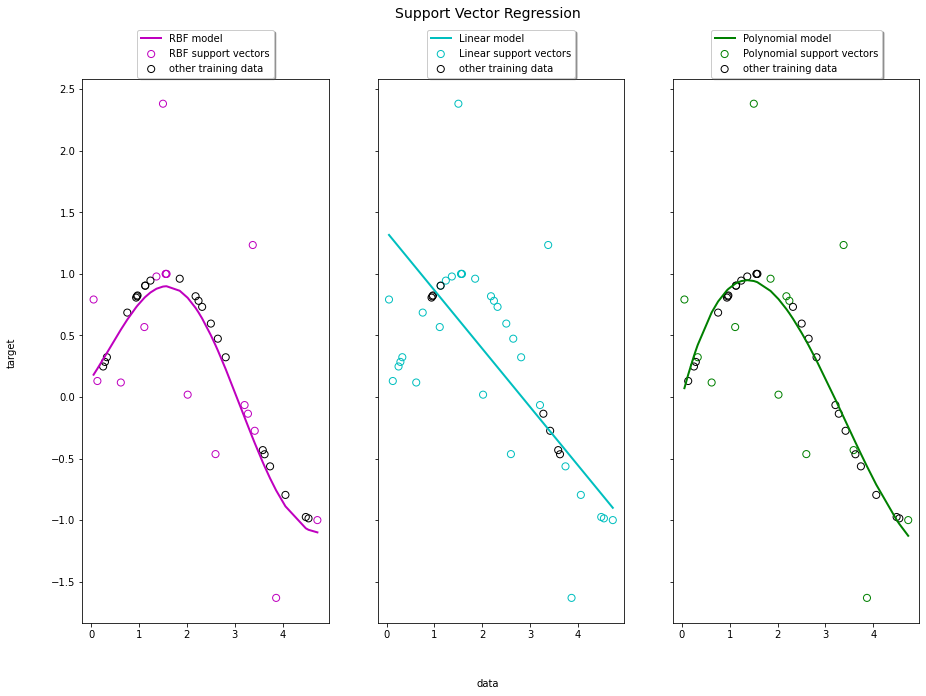

In [67]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(
  nrows=1,
  ncols=3,
  figsize=(15, 10),
  sharey=True
)
for ix, svr in enumerate(svrs):
  axes[ix].plot(
    x,
    svr.fit(x, y).predict(x),
    color=model_color[ix],
    lw=lw,
    label='{} model'.format(kernel_label[ix])
  )
  axes[ix].scatter(
    x[svr.support_],
    y[svr.support_],
    facecolor='none',
    edgecolor=model_color[ix],
    s=50,
    label='{} support vectors'.format(kernel_label[ix])
  )
  axes[ix].scatter(
    x[np.setdiff1d(np.arange(len(x)), svr.support_)],
    y[np.setdiff1d(np.arange(len(x)), svr.support_)],
    facecolor='none',
    edgecolor='k',
    s=50,
    label='other training data'
  )
  axes[ix].legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    ncol=1,
    fancybox=True,
    shadow=True
  )

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle('Support Vector Regression', fontsize=14)
plt.show()

## 제6절. K-최근접 이웃(KNN)
### 1. 개념
- K-최근접 이웃은 유사한 특성을 가진 데이터는 유사한 범주에 속하는 경향이 있다는 가정으로 데이터를 분류하는 머신러닝 기법이다.
- 학습데이터를 그대로 저장한 뒤 새로운 데이터 포인트에 대해 학습데이터에서 가장 가까운 k개의 데이터 포인트를 찾아 그것들로부터 새로운 데이터 포인트의 범주를 라벨링한다.
- 단순한 방식을 사용하지만 KNN은 손글씨 및 위성 이미지 분석 등 다양한 분류 및 회귀 문제에서 높은 예측력을 보인다.
- 또한 비모수적인 방식을 사용하기 때문에 결정경계가 매우 불규칙한 분류 상황에서 종종 높은 예측성능을 보인다.

#### 1. KNN 분류
- KNN 분류 모델은 샘플데이터로부터 가장 가까운 학습데이터 포인트 하나를 최근접 이웃으로 선택해 예측에 사용한다.
- 학습데이터 그래프상에서 새로운 데이터가 '거리상 가장 가까운' 데이터와 유사한 집단에 속할 것이라고 생각할 수 있다.
- 새로운 데이터와 기존 데이터들의 거리 계산을 위해 특정한 거리계산식을 이용한다.
- 데이터 사이의 거리를 측정하는 다양한 기법 중에서도, KNN은 유클리디안 거리를 많이 사용한다.
  - $d=\sqrt{(x_1-y_1)^2+(x_2-y_2)^2+...+(x_n-y_n)^2}$
- 집단이 가깝게 맞닿아있는 부분에서 경계를 정확히 알기 어려울 때는 k의 수를 조절해야 한다.
- k가 1일 때 가장 가까운 데이터로 새로운 데이터를 분류하면 분류 정확도가 낮게 나오는 경우도 많다.
- 경계가 뚜렷하지 않은 특징은 '일정한 잡음(noise)'라고 간주하고, 노이즈를 고려한 파라미터 k를 설정해야 한다.

#### 2. KNN 회귀
- KNN 회귀는 가까운 이웃 데이터들을 고려하지만 개별값을 예측한다는 차이가 있다.
- 즉, KNN 회귀는 k개의 이웃 데이터를 사용해 회귀선을 도출한다.
- KNN은 하나의 회귀식을 도출하는 것이 아니라는 점에서 선형 회귀와 다른 특징을 보인다.
- KNN 회귀는 주어진 입력을 바탕으로 가장 잘 예측된 평균값들의 집합을 나타낸다.
- 그렇기 때문에 종속변수에 대한 독립변수의 영향력을 의미하는 회귀계수는 KNN 회귀에서 확인되지 않는다.
- 만약 x축이 '시점'이라면 KNN 회귀 모델은 모든 시점의 평균 데이터를 예측하게 된다.
- 모든 시점에서 예측된 값들을 하나의 선으로 연결하면 예측에 사용된 데이터들에 대한 표준 데이터를 표시할 수 있으므로 시계열분석에도 종종 사용할 수 있다.

### 2. scikit-learn의 KNeighborsClassifier
```
class sklearn.neighbors.KNeighborsClassifier(
  n_neighbors=5,
  *,
  weights='uniform',
  algorithm='auto',
  leaf_size=30,
  p=2,
  metric='minkowski',
  metric_params=None,
  n_jobs=None
)
```
- 매개변수
  - `n_neighbors` : 쿼리에 사용할 이웃 수 k이다.
  - `weights` : 예측에 사용되는 가중치 함수이다. `'uniform'`(각 이웃의 포인트는 동일한 가중치), `'distance'`(거리의 역수로 가중치) 등을 사용할 수 있다.
  - `algorithm` : 가장 가까운 이웃 데이터를 계산하는 데 사용되는 알고리즘을 정한다. `'auto'`는 `fit()`에 전달된 값을 기반으로 가장 적절한 알고리즘을 판단한다. `'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'` 중 하나를 선택할 수 있다.
  - `leaf_size` : BallTree 또는 KDTree에 전달된 리프 크기이다.
  - `p` : Minkowski 메트릭에 대한 검정력 매개변수이다. `p=2`일 때 유클리디언 거리를 L2로 사용하는 것과 같다. 임의의 p에 대해서는 `minkowski_distance(l_p)`를 사용한다.
  - `mertic` : 거리 메트릭이다. 기본 메트릭은 `minkowski`이다. `p=2`인 경우 표준 유클리드 메트릭과 동일하기 때문에 기본값으로 KNN을 수행할 경우 유클리드 거리 기반이다.
  - `metric_params` : 메트릭 함수에 대한 추가 키워드 인수이다.
  - `n_jobs` : 근접 데이터 탐색을 위한 병렬 작업의 수이다.
- 메서드
  - `fit(X, y)` : 학습데이터로부터 KNN 분류기를 적합시킨다.
  - `get_params([deep])` : 추정기의 파라미터를 얻는다.
  - `kneighbors([X, n_neighbors, return_distance])` : 데이터 포인트의 K-neighbors를 찾는다.
  - `predict(X)` : 주어진 데이터로 클래스를 분류해 예측하는 메서드이다.
  - `predict_proba(X)` : 테스트 샘플 X의 확률 추정값을 반환한다.
  - `score(X, y[, sample_weight])` : 테스트 샘플데이터와 실젯값이 주어졌을 때 평균 정확도(Accuracy)를 반환한다.

**코드 실습**
- 캐글의 데이터로 KNN을 실습해보자.
- 인도의 간질환자에 대한 기록이 담긴 데이터세트를 캐글에서 다운로드할 수 있다.
- Dataset 변수를 통해 간질환자는 두 집단으로 나뉘어 있다는 것을 알 수 있다.
- Dataset을 타깃변수로 하여 KNN 분류를 수행해보자
- www.kaggle.com/uciml/indian-liver-patient-records

In [68]:
liver = pd.read_csv('./datasets/indian_liver_patient.csv')

print(liver['Dataset'].unique())
liver.head()

[1 2]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [69]:
liver['Gender'] = np.where(liver['Gender'] == 'Female', 0, 1)
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [70]:
liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [71]:
liver.dropna(axis=0, inplace=True)

liver.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [72]:
from sklearn.model_selection import train_test_split

x = liver[liver.columns.difference(['Dataset'])]
y = liver['Dataset']

train_x, test_x, train_y, test_y = train_test_split(
  x,
  y,
  stratify=y,
  train_size=0.7,
  random_state=1
)

print(
  train_x.shape,
  test_x.shape,
  train_y.shape,
  test_y.shape
)

(405, 10) (174, 10) (405,) (174,)


In [73]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=15)

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('')
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[106  18]
 [ 39  11]]

정확도	67.24%
정밀도	73.1%
재현율	85.48%
F1	78.81%


### 3. scikit-learn의 KNeighborsRegressor
```
class sklearn.neighbors.KNeighborsRegressor(
  n_neighbors=5,
  *,
  weights='uniform',
  algorithm='auto',
  leaf_size=30,
  p=2,
  metric='minkowski',
  metric_params=None,
  n_jobs=None
)
```
- 매개변수
  - `n_neighbors` : 쿼리에 사용할 이웃 수 k이다.
  - `weights` : 예측에 사용되는 가중치 함수이다. `'uniform'`(각 이웃의 포인트는 동일한 가중치), `'distance'`(거리의 역수로 가중치) 등을 사용할 수 있다.
  - `algorithm` : 가장 가까운 이웃 데이터를 계산하는 데 사용되는 알고리즘을 정한다. `'auto'`는 `fit()`에 전달된 값을 기반으로 가장 적절한 알고리즘을 판단한다. `'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'` 중 하나를 선택할 수 있다.
- 메서드
  - `fit(X, y)` : 학습데이터로부터 KNN 회기를 적합시킨다.
  - `get_params([deep])` : 추정기의 파라미터를 얻는다.
  - `kneighbors([X, n_neighbors, return_distance])` : 데이터 포인트의 K-neighbors를 찾는다.
  - `predict(X)` : 주어진 데이터로 클래스를 분류해 예측하는 메서드이다.
  - `score(X, y[, sample_weight])` : 테스트 샘플데이터와 실젯값이 주어졌을 때 결정계수(R^2)를 반환한다.

**코드 실습**
- 임의의 데이터로 KNN을 사용한 회귀분석을 실행해보자.
- 먼저 넘파이를 사용해 임의로 데이터를 생성해준다.
- 또한 타깃데이터인 y값에 노이즈를 추가한다.

In [75]:
np.random.seed(0)
x = np.sort(5*np.random.rand(400, 1), axis=0)
t = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

print(x[:10])
print(t[:10])
print(y[:10])

[[0.02]
 [0.06]
 [0.06]
 [0.07]
 [0.08]
 [0.08]
 [0.09]
 [0.09]
 [0.1 ]
 [0.1 ]]
[[0.  ]
 [0.01]
 [0.02]
 [0.03]
 [0.04]
 [0.05]
 [0.06]
 [0.07]
 [0.08]
 [0.09]]
[0.02 0.06 0.06 0.07 0.08 0.08 0.09 0.09 0.1  0.1 ]


In [76]:
y[::1] += 1*(0.5-np.random.rand(400))
print(y[:10])

[ 0.12 -0.37  0.46 -0.38 -0.29  0.13  0.27  0.36 -0.02  0.57]


In [77]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
  x,
  y,
  train_size=0.7,
  random_state=1
)

print(
  train_x.shape,
  test_x.shape,
  train_y.shape,
  test_y.shape
)

(280, 1) (120, 1) (280,) (120,)


In [78]:
from sklearn.neighbors import KNeighborsRegressor

reg_uni = KNeighborsRegressor(
  n_neighbors=20,
  weights='uniform'
)
reg_dis = KNeighborsRegressor(
  n_neighbors=20,
  weights='distance'
)

reg_uni.fit(train_x, train_y)
reg_dis.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [79]:
uni_pred = reg_uni.predict(test_x)
dis_pred = reg_dis.predict(test_x)

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

preds = [uni_pred, dis_pred]
weights = ['uniform', 'distance']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(
  index = weights,
  columns = evls
)

for pred, nm in zip(preds, weights):
  mse = mean_squared_error(test_y, pred)
  mae = mean_absolute_error(test_y, pred)
  rmse = np.sqrt(mse)

  results.loc[nm]['mse'] = mse
  results.loc[nm]['rmse'] = rmse
  results.loc[nm]['mae'] = mae

results

,mse,rmse,mae
uniform,0.097464,0.312192,0.274416
distance,0.112413,0.33528,0.283344


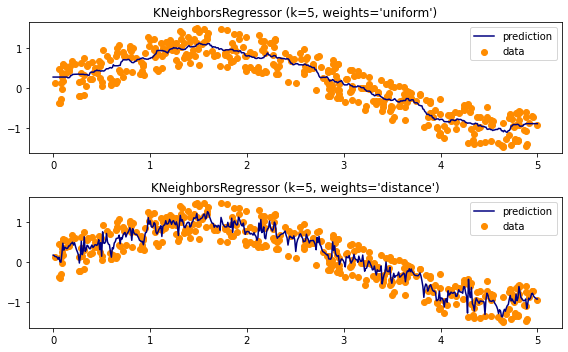

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

preds = [uni_pred, dis_pred]

for i, weight in enumerate(['uniform', 'distance']):
  reg = KNeighborsRegressor(n_neighbors=20, weights=weight)

  pred = reg.fit(x, y).predict(t)
  
  plt.subplot(2, 1, i+1)
  plt.scatter(
    x,
    y,
    color='darkorange',
    label='data'
  )
  plt.plot(
    t,
    pred,
    color='navy',
    label='prediction'
  )
  plt.axis('tight')
  plt.legend()
  plt.title(
    'KNeighborsRegressor (k=%i, weights=\'%s\')'%(5, weight)
  )

plt.tight_layout()
plt.show()

## 제7절. 의사결정나무(Decision Tree)

### 1. 개념
- 결정트리는 데이터를 분류하고 예측하는 결정에 이르기 위해 특정 기준에 따라 '예/아니오'로 답할 수 있는 질문을 이어나가면서 학습한다.
- 즉, 원본데이터에서 하나의 규칙을 만들 때마다 규칙노드를 만들고, 가지를 치면서 내려간다.
- 그러므로 결정트리를 통해 얻은 예측 결과는 분류 규칙이 명확하여 해석을 쉽게 할 수 있다.
- 입력변수와 목표변수에 연속형 데이터와 범주형 데이터를 모두 사용할 수 있다.
- 또한 선형성과 정규성 등의 가정이 필요하지 않아 전처리 과정에 모델의 성능이 큰 영향을 받지 않는다.

#### 1. 결정트리 생성하기
- 결정트리에서 학습의 의미는 '정답에 가장 빨리 도달하는 질문목록을 학습'하는 것이다.
- 결정트리는 데이터를 통해 각 마디에서 적절한 최적의 분리규칙(Splitting Rule)을 찾아 결정트리의 질문목록을 생성한다.
- 트리를 성장시키는 과정에서 적절한 정지규칙(Stopping Rule)을 만족하면 트리의 자식마다(노드) 생성을 중단한다.
- 분리규칙을 설정하는 분리기준(Splitting Criterion)은 목표변수가 이산형 데이터인지, 연속형 데이터인지에 따라 다르다.

**1. 이상형 목표변수**
- 지도학습 문제 : 분류분석
- 기준값에 따른 분리기준
  - 카이제곱 통계량 p값 : p값이 가장 작은 예측변수와 그 때의 최적분리에 의해서 자식마디를 형성
  - 지니지수 : 지니지수를 감소시키는 예측변수와 그 때의 최적분리에 의해서 자식마디를 형성
  - 엔트로피지수 : 엔트로피지수가 가장 작은 예측변수와 이때의 최적분리에 의해 자식마디를 형성

**2. 연속형 목표변수**
- 지도학습 문제 : 회귀분석
- 기준값에 따른 분리기준
  - 분산분석에서 F통계량 : p값이 가장 작은 예측변수와 그 때의 최적분리에 의해서 자식마디를 형성
  - 분산의 감소량 : 분산의 감소량을 최대화하는 기준의 최적분리에 의해서 자식마디를 형성

#### 2. 결정트리 복잡도 제어하기
- 데이터를 학습할 때, 트리의 크기를 의사결정나무 모델의 복잡도라고 판단할 수 있다.
- 학습데이터를 분할하는 질문목록을 생성할 때 모든 데이터가 각각 분할되도록 가지를 치도록 하는 모델을 생성한다면, 이 모델은 해당 학습데이터에 대해 높은 예측력을 가질 것이다.
- 하지만 데이터의 특성이 학습데이터와 다른 평가데이터를 이 모델에 적용하면 예측력이 감소해 과적합 문제가 발생할 수 있다.
- 이러한 과적합 문제를 방지하기 위해 가지치키(Pruning)을 이용해서 트리의 성장을 제한한다.
- 가지치기의 방식에는 여러 가지가 있지만, 사이킷런에서 지원하는 방식은 사전가지치기(Pre-pruning)이다.
- 사전가지치기는 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 노드가 분할하기 위한 포인트의 최소 개수를 지정한다.

#### 3. 트리의 특성 중요도
- 결정트리는 트리가 어떻게 작동했는지 속성을 살펴볼 수 있다.
- 변수중요도(또는 특성중요도; Feature Importance)는 트리를 만드는 결정에 각각의 변수가 얼마나 중요했는지를 평가하는 것이다.
- 변수중요도는 0과 1 사이의 숫자로 표현된다.
- 변수중요도 0은 트리를 만드는 결정에 해당 변수가 전혀 사용되지 않았다는 뜻이며, 변수중요도 1은 트리를 만드는 결정에 해당 변수가 목푯값을 완벽하게 예측했다는 의미이다.
- 변수중요도의 총 합은 1이다.
- 다만, 선형 모델의 계수와는 달리, 변수중요도 값은 항상 양수이다.
- 또한 목푯값에 대해 어떤 클래스를 지지하는지는 알 수 없다.

#### 4. 의사결정나무의 장단점
- 장점
  - 모델을 쉽게 설명할 수 있고 시각화하기 편하다
  - 데이터의 스케일에 영향을 받지 않아 데이터의 정규화나 표준화 등의 전처리를 요구하지 않는다.
- 단점
  - 가지치기 방식에도 불구하고 과대적합 가능성이 높아 일반화 성능이 우수하지 않다.

### 2. scikit-learn의 tree.DecisionTreeClassifier
```
class sklearn.tree.DecisionTreeClassifier(
  *,
  criterion='gini',
  splitter='best',
  max_depth=None,
  min_samples_split=2,
  in_samples_leaf=1,
  min_weight_fraction_leaf=0.0,
  max_features=None,
  random_state=None,
  max_leaf_nodes=None,
  min_impurity_decrease=0.0,
  class_weight=None,
  ccp_alpha=0.0
)
```
- 매개변수
  - `criterion` : 노드를 분할할 때 사용할 함수이다. `'gini'` 또는 `'entropy'`에서 고를 수 있다.
  - `splitter` : `'best'` 또는 `'random'`에서 고를 수 있다. `'best'`는 분할식이 가장 좋은 노드를 선택하는 방식이고, `'random'`은 임의적으로 노드를 선택하는 방식이다.
  - `max_depth` : 트리의 최대 깊이를 설정한다.
  - `min_samples_split` : 내부노드를 분할하는 데 필요한 최소 샘플 수를 설정한다.
  - `min_samples_leaf` : 리프노드에 있어야 하는 최소 샘플 수를 설정한다.
  - `max_features` : 최상의 분할을 찾을 때 고려하는 변수의 개수를 설정한다. int 값으로 개수를 설정하거나, `'auto'`(원본데이터의 변수 개수), `'sqrt'`(제곱근), `'log2'`(로그) 중에 하나를 선택할 수 있다. `default=None`은 원본데이터의 변수 개수를 `max_features`로 설정한다.
  - `random_state` : 추정량의 임의성을 제어한다.
  - `max_leaf_nodes` : 결정트리의 최대 리프 노드 개수를 설정한다. `default=None`은 리프 노드의 개수를 제한하지 않는다.
  - `min_impurity_decrease` : 노드가 분할되는 조건을 설정한다. 해당 값보다 작거나 같은 수준으로 불순도가 감소할 경우, 노드를 분할한다.
  - `ccp_alpha` : `pruning`에 사용하는 파라미터이다. `ccp-alpha`는 최소 비용-복잡성 정리에 사용되는 복잡성 매개변수이다. `ccp-alpha`보다 작은 비용-복잡성을 가진 서브트리 중 가장 비용-복잡성이 큰 트리를 선택한다. default로 할 경우 `pruning`은 수행되지 않는다.
- 속성
  - `feature_importances_` : 변수중요도를 반환한다.
- 메서드
  - `cost_complexity_pruning_path` : 최소 비용-복잡성 가지치기 방식의 가지치기 경로를 계산한다.
  - `fit(X, y)` : 모델을 학습시킨다.
  - `predict(X)` : 결정트리 분류 모델을 사용해 예측한다.
  - `predict_proba(X)` : 확률을 추정한다.
  - `score(X, y)` : 예측의 평균 정확도(Accuracy)를 반환한다.

**코드 실습**
- UCI Machine Learning 저장소의 독일 신용데이터를 통해 결정트리 분류분석을 수행해보자.
- 데이터의 자세한 설명은 아래에서 확인할 수 있다(archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)).

In [82]:
credit = pd.read_csv('./datasets/credit_final.csv')

credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [83]:
feature_columns = list(credit.columns.difference(['credit.rating']))
x = credit[feature_columns]
y = credit['credit.rating']

In [84]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
  x,
  y,
  stratify=y,
  test_size=0.3,
  random_state=1
)

print(
  train_x.shape,
  test_x.shape,
  train_y.shape,
  test_y.shape
)

(700, 20) (300, 20) (700,) (300,)


In [85]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5)

clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=5)

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('')
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[ 28  62]
 [ 25 185]]

정확도	71.0%
정밀도	74.9%
재현율	88.1%
F1	80.96%


In [87]:
from sklearn.metrics import classification_report

report = classification_report(test_y, pred)

print(report)

              precision    recall  f1-score   support

           0       0.53      0.31      0.39        90
           1       0.75      0.88      0.81       210

    accuracy                           0.71       300
   macro avg       0.64      0.60      0.60       300
weighted avg       0.68      0.71      0.68       300



c:\Users\Bob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


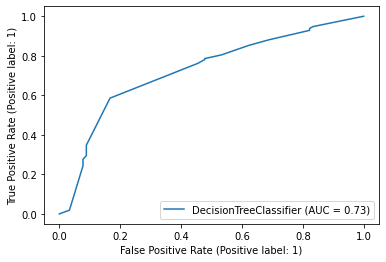

ROC_AUC_score : 0.7264285714285714


In [88]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

plot_roc_curve(clf, test_x, test_y)
plt.show()

R_A_score = roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1])
print('ROC_AUC_score :', R_A_score)

In [89]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(x.columns)
feature_importances = pd.concat(
  [
    column_nm,
    pd.DataFrame(importances)
  ],
  axis=1
)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

                        feature_nm  importances
0                  account.balance     0.263282
1                              age     0.114826
2                   apartment.type     0.021665
3                     bank.credits     0.000000
4                    credit.amount     0.086741
5           credit.duration.months     0.187908
6                   credit.purpose     0.059083
7                   current.assets     0.000000
8                       dependents     0.000000
9              employment.duration     0.000000
10                  foreign.worker     0.000000
11                       guarantor     0.000000
12                installment.rate     0.000000
13                  marital.status     0.013993
14                      occupation     0.011790
15                   other.credits     0.034003
16  previous.credit.payment.status     0.123825
17              residence.duration     0.029803
18                         savings     0.053080
19                       telephone     0

In [90]:
feature_names = feature_columns
target_names = np.array(['0', '1'])

In [91]:
import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz

dt_dot_data = export_graphviz(
  clf,
  feature_names=feature_names,
  class_names=target_names,
  filled=True,
  rounded=True,
  special_characters=True
)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

In [92]:
from IPython.display import Image

Image(dt_graph.create_png())

InvocationException: GraphViz's executables not found

### 3. scikit-learn의 tree.DecisionTreeRegressor
```
class sklearn.tree.DecisionTreeRegressor(
  *,
  criterion='squared_error',
  splitter='best',
  max_depth=None,
  min_samples_split=2,
  min_samples_leaf=1,
  min_weight_fraction_leaf=0.0,
  max_features=None,
  random_state=None,
  max_leaf_nodes=None,
  min_impurity_decrease=0.0,
  ccp_alpha=0.0
)
```
- 매개변수
  - `criterion` : 노드를 분할할 때 사용할 함수이다. `'gini'` 또는 `'entropy'`에서 고를 수 있다.
  - `splitter` : `'best'` 또는 `'random'`에서 고를 수 있다. `'best'`는 분할식이 가장 좋은 노드를 선택하는 방식이고, `'random'`은 임의적으로 노드를 선택하는 방식이다.
  - `max_depth` : 트리의 최대 깊이를 설정한다.
  - `min_samples_split` : 내부노드를 분할하는 데 필요한 최소 샘플 수를 설정한다.
  - `min_samples_leaf` : 리프노드에 있어야 하는 최소 샘플 수를 설정한다.
  - `max_features` : 최상의 분할을 찾을 때 고려하는 변수의 개수를 설정한다. int 값으로 개수를 설정하거나, `'auto'`(원본데이터의 변수 개수), `'sqrt'`(제곱근), `'log2'`(로그) 중에 하나를 선택할 수 있다. `default=None`은 원본데이터의 변수 개수를 `max_features`로 설정한다.
  - `random_state` : 추정량의 임의성을 제어한다.
  - `max_leaf_nodes` : 결정트리의 최대 리프 노드 개수를 설정한다. `default=None`은 리프 노드의 개수를 제한하지 않는다.
  - `min_impurity_decrease` : 노드가 분할되는 조건을 설정한다. 해당 값보다 작거나 같은 수준으로 불순도가 감소할 경우, 노드를 분할한다.
  - `ccp_alpha` : `pruning`에 사용하는 파라미터이다. `ccp-alpha`는 최소 비용-복잡성 정리에 사용되는 복잡성 매개변수이다. `ccp-alpha`보다 작은 비용-복잡성을 가진 서브트리 중 가장 비용-복잡성이 큰 트리를 선택한다. default로 할 경우 `pruning`은 수행되지 않는다.
- 속성
  - `feature_importances_` : 변수중요도를 반환한다.
- 메서드
  - `cost_complexity_pruning_path` : 최소 비용-복잡성 가지치기 방식의 가지치기 경로를 계산한다.
  - `fit(X, y)` : 모델을 학습시킨다.
  - `predict(X)` : 결정트리 분류 모델을 사용해 예측한다.
  - `score(X, y)` : 예측의 결정계수(R^2)를 반환한다.

**코드 실습**
- Numpy를 이용해 임의의 데이터를 생성해 결정트리로 회귀분석을 수행해보자.
- 임의의 데이터를 생성하고 노이즈를 추가한 뒤 산점도로 데이터의 형태를 확인해본다.

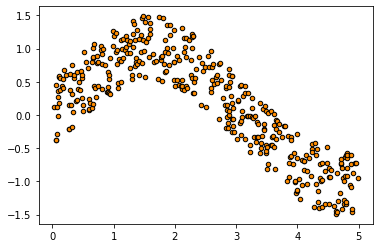

In [93]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(0)

x = np.sort(5*np.random.rand(400, 1), axis=0)
t = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

y[::1] += 1*(0.5 - np.random.rand(400))

plt.scatter(
  x,
  y,
  s=20,
  edgecolor='black',
  c='darkorange',
  label='data'
)

In [94]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
  x,
  y,
  train_size=0.7,
  random_state=1
)

print(
  train_x.shape,
  test_x.shape,
  train_y.shape,
  test_y.shape
)

(280, 1) (120, 1) (280,) (120,)


In [96]:
reg_1 = DecisionTreeRegressor(max_depth=2)
reg_1.fit(train_x, train_y)
reg_2 = DecisionTreeRegressor(max_depth=5)
reg_2.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=5)

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred_1 = reg_1.predict(test_x)
pred_2 = reg_2.predict(test_x)

preds = [pred_1, pred_2]
weights = ['max_depth=2', 'max_depth=5']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=weights, columns=evls)
for pred, nm in zip(preds, weights):
  mse = mean_squared_error(test_y, pred)
  mae = mean_absolute_error(test_y, pred)
  rmse = np.sqrt(mse)

  results.loc[nm]['mse'] = round(mse, 2)
  results.loc[nm]['rmse'] = round(rmse, 2)
  results.loc[nm]['mae'] = round(mae, 2)

results

,mse,rmse,mae
max_depth=2,0.12,0.35,0.29
max_depth=5,0.12,0.35,0.3


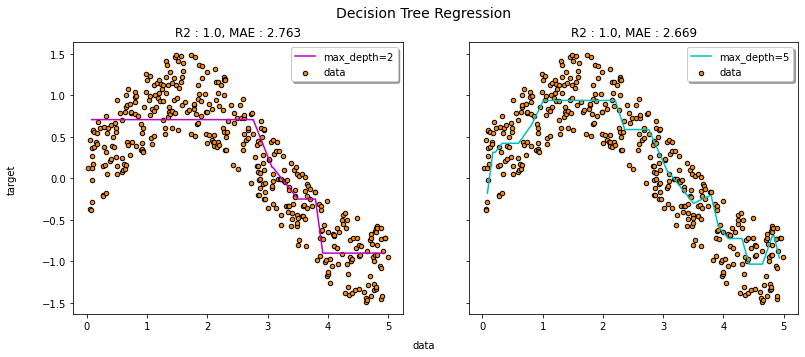

In [107]:
test_x_2 = np.sort(5*np.random.rand(40, 1), axis=0)

regs = [reg_1, reg_2]
depths = ['max_depth=2', 'max_depth=5']
model_color = ['m', 'c']
fig, axes = plt.subplots(
  nrows=1,
  ncols=2,
  sharey=True,
  figsize=(13, 5)
)
for ix, reg in enumerate(regs):
  pred_2 = reg.fit(x, y).predict(test_x_2)
  r2 = reg.score(test_x_2, pred_2)
  mae = mean_absolute_error(test_x_2, pred_2)

  axes[ix].plot(
    test_x_2,
    pred_2,
    color=model_color[ix],
    label='{}'.format(depths[ix])
  )
  axes[ix].scatter(
    x,
    y,
    s=20,
    edgecolor='black',
    c='darkorange',
    label='data'
  )
  axes[ix].legend(
    loc='upper right',
    ncol=1,
    fancybox=True,
    shadow=True
  )
  axes[ix].set_title(
    'R2 : {r}, MAE : {m}'.format(
      r=round(r2, 3),
      m=round(mae, 3)
    )
  )

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle('Decision Tree Regression', fontsize=14)
plt.show()

## 제8절. 앙상블(Ensemble)

### 1. 개념
- 앙상블은 단일 결정 트리의 단점을 극복하기 위해 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 방법이다.
- 즉, 주어진 자료로부터 여러 개의 예측 모형들을 만든 후 예측모형들을 조합하여 하나의 최종 예측 모형을 만드는 것이다.
- 편향, 잡음 및 분산으로 인한 오류를 막고 과적합을 방지하기 위해 사용된다.
- 대표적인 앙상블 기법으로는 배깅(Bagging), 부스팅(Boosting), 랜덤포레스트(Random Forest)가 있다.

### 2. 붓스트랩(Bootstrap)
- 붓스트랩은 랜덤 샘플링의 일종으로 가설 검증을 하거나 통계 계산을 하기 전에 단순임의복원추출법(중복허용)을 적용하여 여러 개의 동일한 크기의 표본 자료를 획득하는 방법이다.
- 주어진 데이터를 원래의 모집단을 대표하는 독립 표본으로 가정하고, 그 자료로부터 중복을 허용한 무작위 재추출을 하여 복수의 자료를 획득하고 각각에서 통계량을 계산한다.

### 3. 배깅(Bagging, Bootstrap Aggregating)

#### 1. 개념
- 주어진 자료를 모집단으로 간주하여 주어진 자료에서 여러 개의 붓스트랩 자료를 생성하고 각각의 붓스트랩 자료에 예측 모형을 만든 후 결합하여 최종 예측모형을 만드는 방식이다.
- 통계분류와 회귀분석에서 사용하는 머신러닝 알고리즘의 안정성과 정확도를 향상시키기 위해 고안된 일종의 앙상블 학습법의 알고리즘이다.
- 분산을 줄이고 정확도를 개선하여 모델의 안정성을 크게 높여 과적합을 방지한다.
- 배깅을 이용한 머신러닝은 '붓스트래핑(Boostraping) - 모델링(Modeling) - 보팅(Voting)' 순서로 진행된다.

#### 2. 보팅(Voting)
- 개념 : 여러 개의 모형으로부터 산출된 결과 중 다수결에 의해 최종 결과를 산정하는 과정이다.
- 진행방법 : 최적 의사결정 트리 구축에서 가장 어려운 가지치기를 진행하지 않고 약한 학습자인 트리를 최대로 성장시킨 후 보팅을 진행한다.

#### 3. 부스팅과의 차이점
- 주어진 자료보다 분산이 적은 앙상블 모델을 얻는 데 중점을 둔다.
- 각 붓스트랩에 대해 붓스트래핑 및 모델링 과정이 병렬적으로 수행된다.

#### 4. Out of Bag
- 개념 : 배깅에서 붓스트래핑을 수행하면 평균적으로 각 예측기에 훈련데이터의 63% 정도만 샘플링된다. 이때 선택되지 않은 나머지 37%를 Out of Bag 샘플이라고 한다. 단, 예측기마다 남겨진 37%의 데이터는 서로 다르다.
- oob_score : 선택되지 않은 37%의 데이터로 모델의 성능평가를 수행하는 데 사용할 수 있다. 따라서 검증세트나 교차검증이 따로 필요하지 않다.

**scikit-learn의 ensemble.BaggingClassifier**
```
class sklearn.ensemble.BaggingClassifier(
  base_estimator=None,
  n_estimators=10,
  *,
  max_samples=1.0,
  max_features=1.0,
  bootstrap=True,
  bootstrap_features=False,
  oob_score=False,
  warm_start=False,
  n_jobs=None,
  random_state=None,
  verbose=0
)
```
- 매개변수
  - `base_estimator` : 배깅에서 수행할 분류기이다. None이면 DecisionTreeClassifier를 수행한다.
  - `n_estimators` : 앙상블의 분류기 모델 수를 설정한다.
  - `max_samples` : 각 기본 추정량을 훈련하기 위해 추출할 샘플 수이다.
  - `max_features` : 각 기본 추정량을 훈련하기 위해 사용할 컬럼의 수이다.
  - `bootstrap` : 샘플(행)을 복원추출할지 여부를 결정한다.
  - `bootstrap_features` : feature(열)을 복원할지 여부를 결정한다.
  - `oob_score` : 일반화 오류를 추정하기 위해 out-of-bag 샘플을 사용할지 여부를 결정한다.
- 속성
  - `oob_score_` : out-of-bag을 사용해 얻은 train 데이터세트의 점수이다. oob_score_를 얻기 위해서는, `oob_score` 매개변수를 True로 설정해야 한다.
- 메서드
  - `fit(X, y)` : 모델을 학습시킨다.
  - `predict(X)` : 배깅을 사용해 예측한다.
  - `predict_proba(X)` : 확률을 추정한다.
  - `score(X, y)` : 예측의 평균 정확도(Accuracy)를 반환한다.

**코드 실습**
- 위스콘신 유방암 진단 데이터세트를 사용해 종양을 예측하는 분류분석을 수행해보자.
- 캐글에서 데이터세트를 다운받을 수 있다(www.kaggle.com/yasserh/breast-cancer-dataset).

In [186]:
breast = pd.read_csv('./datasets/breast-cancer.csv')

breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


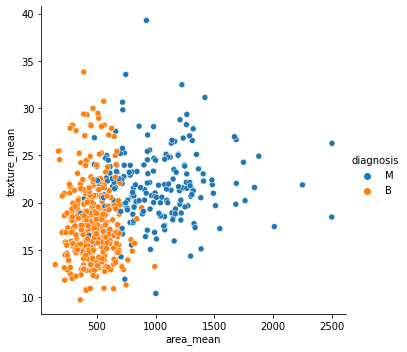

In [187]:
sns.relplot(
  x='area_mean',
  y='texture_mean',
  hue='diagnosis',
  data=breast
)

In [188]:
breast['diagnosis'] = np.where(breast['diagnosis'] == 'M', 1, 0)
features = ['area_mean', 'area_worst']
x = breast[features]
y = breast['diagnosis']

In [189]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
  x,
  y,
  train_size=0.7,
  stratify=y,
  random_state=1
)

print(
  train_x.shape,
  test_x.shape,
  train_y.shape,
  test_y.shape
)

(398, 2) (171, 2) (398,) (171,)


In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())

clf.fit(train_x, train_y)
pred = clf.predict(test_x)

print('Accuracy Score :', clf.score(test_x, test_y))

Accuracy Score : 0.9122807017543859


In [191]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
  confusion_matrix(test_y, pred),
  index=['True[0]', 'True[1]'],
  columns=['Pred[0]', 'Pred[1]']
)

,Pred[0],Pred[1]
True[0],101,6
True[1],9,55


c:\Users\Bob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


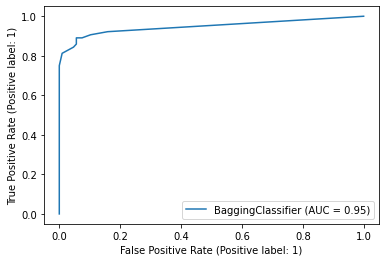

ROC_AUC_Score : 0.9475759345794392


In [192]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

plot_roc_curve(clf, test_x, test_y)
plt.show()
print('ROC_AUC_Score :', roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1]))

In [193]:
clf_oob = BaggingClassifier(
  base_estimator=DecisionTreeClassifier(),
  oob_score=True
)
clf_oob.fit(x, y)
oob = clf_oob.oob_score_

oob

c:\Users\Bob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:747: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\Bob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:753: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.9068541300527241

**scikit-learn의 ensemble.BaggingRegressor**
```
class sklearn.ensemble.BaggingRegressor(
  base_estimator=None,
  n_estimators=10,
  *,
  max_samples=1.0,
  max_features=1.0,
  bootstrap=True,
  bootstrap_features=False,
  oob_score=False,
  warm_start=False,
  n_jobs=None,
  random_state=None,
  verbose=0
)
```
- 매개변수
  - `base_estimator` : 배깅에서 수행할 분류기이다. None이면 DecisionTreeClassifier를 수행한다.
  - `n_estimators` : 앙상블의 분류기 모델 수를 설정한다.
  - `max_samples` : 각 기본 추정량을 훈련하기 위해 추출할 샘플 수이다.
  - `max_features` : 각 기본 추정량을 훈련하기 위해 사용할 컬럼의 수이다.
  - `bootstrap` : 샘플(행)을 복원추출할지 여부를 결정한다.
  - `bootstrap_features` : feature(열)을 복원할지 여부를 결정한다.
  - `oob_score` : 일반화 오류를 추정하기 위해 out-of-bag 샘플을 사용할지 여부를 결정한다.
- 속성
  - `oob_score_` : out-of-bag을 사용해 얻은 train 데이터세트의 점수이다. oob_score_를 얻기 위해서는, `oob_score` 매개변수를 True로 설정해야 한다.
- 메서드
  - `fit(X, y)` : 모델을 학습시킨다.
  - `predict(X)` : 배깅을 사용해 예측한다.
  - `score(X, y)` : 예측의 결정계수(R^2)를 반환한다.

**코드 실습**
- 캐글의 자동차 데이터세트를 사용해 자동차의 가격을 예측해보자.
- 캐글에서 데이터세트를 다운받을 수 있다(www.kaggle.com/goyalshalini93/car-data).

In [160]:
car = pd.read_csv('./datasets/CarPrice_Assignment.csv')

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [162]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))

x = car_num[features]
y = car_num['price']

print(x.shape, y.shape)

(205, 13) (205,)


In [164]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

reg = BaggingRegressor(
  base_estimator=DecisionTreeRegressor(),
  oob_score=True
)

reg.fit(x, y)
reg.oob_score_

c:\Users\Bob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_bagging.py:1204: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


0.832318024778187

### 4. 부스팅(Boosting)

#### 1. 개념
- 부스팅은 예측력이 약한 모형들을 결합해 강한 예측모형을 만드는 방법이다.
- 붓스트랩을 병렬로 수행하여 각 모델을 독립적으로 구축하는 배깅과 달리, 부스팅은 순차방식으로 학습을 진행한다.
- 훈련 단계에서 알고리즘은 각 모델에 가중치를 할당하므로 분류결과가 좋은 데이터는 높은 가중치를, 분류결과가 좋지 않은 데이터는 낮은 가중치를 할당받아 다음 붓스트래핑에서 추출될 확률이 높아진다.
- 따라서 배깅에 비해 모델의 장점을 최적화하고 train 데이터에 대해 오류가 적은 결합모델을 생성할 수 있다는 장점이 있다.
- 다만 train 데이터 과적합할 위험이 있다.

**scikit-learn의 ensemble.AdaBoostClassifier**
```
class sklearn.ensemble.AdaBoostClassifier(
  base_estimator=None,
  *,
  n_estimators=50,
  learning_rate=1.0,
  algorithm='SAMME.R',
  random_state=None
)
```
- 매개변수
  - `base_estimator` : 부스팅에서 수행하는 분류기이다. `None`이면 `DecisionTreeClassifier`를 수행한다.
  - `n_estimators` : 부스팅이 종료되는 최대 추정기 수이다.
  - `learning_rate` : 각 부스팅의 반복 시 분류기에 적용되는 가중치이다. 학습률이 높을수록 각 분류기의 기여도가 높아진다.
  - `random_state` : 각 부스팅의 `base_estimator`에서 random seed를 제어한다.
- 속성
  - `feature_importances_` : 불순도를 기반으로 하는 변수중요도를 출력한다.
- 메서드
  - `fit(X, y)` : 모델을 학습시킨다.
  - `predict(X)` : 부스팅을 사용해 예측한다.
  - `predict_proba(X)` : 확률을 추정한다.
  - `score(X, y)` : 예측의 평균 정확도(Accuracy)를 반환한다.

**코드 실습**
- 배깅에서 수행한 유방암 데이터로 부스팅을 수행해보자.

In [194]:
breast = pd.read_csv('./datasets/breast-cancer.csv')

breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [195]:
breast['diagnosis'] = np.where(breast['diagnosis'] == 'M', 1, 0)
features = ['area_mean', 'texture_mean']

x = breast[features]
y = breast['diagnosis']

In [196]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
  x,
  y,
  test_size=0.3,
  stratify=y,
  random_state=1
)

print(
  train_x.shape,
  test_x.shape,
  train_y.shape,
  test_y.shape
)

(398, 2) (171, 2) (398,) (171,)


In [197]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(base_estimator=None)

clf.fit(train_x, train_y)

AdaBoostClassifier()

In [198]:
pred = clf.predict(test_x)

print('정확도 :', clf.score(test_x, test_y))

정확도 : 0.9122807017543859


In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('')
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[102   5]
 [ 10  54]]

정확도	91.23%
정밀도	91.53%
재현율	84.38%
F1	87.8%


c:\Users\Bob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


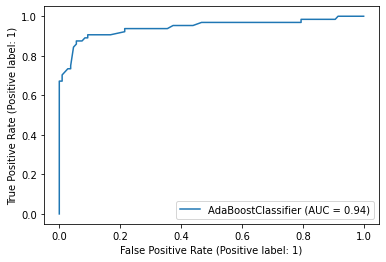

ROC_AUC_Score : 0.9444363317757009


In [200]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

plot_roc_curve(clf, test_x, test_y)
plt.show()
print('ROC_AUC_Score :', roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1]))

In [202]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(['area_mean', 'texture_mean'])
feature_importances = pd.concat(
  [column_nm, pd.DataFrame(importances)],
  axis=1
)
feature_importances.columns = ['feature_nm', 'importances']
feature_importances

,feature_nm,importances
0,area_mean,0.56
1,texture_mean,0.44


<BarContainer object of 2 artists>

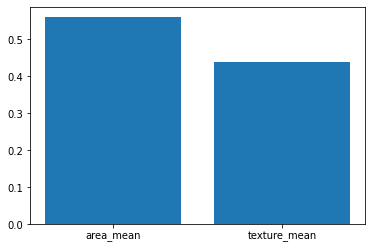

In [203]:
xtick_label_position = list(range(len(features)))

plt.xticks(xtick_label_position, features)
plt.bar(
  [x for x in range(len(importances))],
  importances
)

**scikit-learn의 ensemble.AdaBoostRegressor**
```
class sklearn.ensemble.AdaBoostRegressor(
  base_estimator=None,
  *,
  n_estimators=50,
  learning_rate=1.0,
  loss='linear',
  random_state=None
)
```
- 매개변수
  - `base_estimator` : 부스팅에서 수행하는 분류기이다. `None`이면 `DecisionTreeClassifier`를 수행한다.
  - `n_estimators` : 부스팅이 종료되는 최대 추정기 수이다.
  - `learning_rate` : 각 부스팅의 반복 시 분류기에 적용되는 가중치이다. 학습률이 높을수록 각 분류기의 기여도가 높아진다.
  - `loss` : 각각의 부스팅 반복 후 가중치를 업데이트할 때 사용하는 손실 함수를 설정한다. `'linear'`, `'square'`, `'exponential'` 중 선택할 수 있다.
  - `random_state` : 각 부스팅의 `base_estimator`에서 random seed를 제어한다.
- 속성
  - `feature_importances_` : 불순도를 기반으로 하는 변수중요도를 출력한다.
- 메서드
  - `fit(X, y)` : 모델을 학습시킨다.
  - `predict(X)` : 부스팅을 사용해 예측한다.
  - `score(X, y)` : 예측의 결정계수(R^2)를 반환한다.

**코드 실습**
- 배깅에서 사용한 자동차 가격 데이터로 부스팅을 수행해보자.

In [204]:
car = pd.read_csv('./datasets/CarPrice_Assignment.csv')

car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [205]:
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID', 'symboling', 'price']))

x = car_num[features]
y = car_num['price']

In [206]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
  x,
  y,
  test_size=0.3,
  random_state=1
)

print(
  train_x.shape,
  test_x.shape,
  train_y.shape,
  test_y.shape
)

(143, 13) (62, 13) (143,) (62,)


In [208]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(base_estimator=None)

reg.fit(train_x, train_y)

pred = reg.predict(test_x)

In [213]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_y, pred)
mae = mean_absolute_error(test_y, pred)
rmse = np.sqrt(mse)
acc = reg.score(test_x, test_y)

print('MSE\t{}'.format(round(mse, 2)))
print('MAE\t{}'.format(round(mae, 2)))
print('RMSE\t{}'.format(round(rmse, 2)))
print('ACC\t{}%'.format(round(acc*100, 2)))

MSE	5781187.94
MAE	1840.94
RMSE	2404.41
ACC	90.42%


In [226]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat(
  [column_nm, pd.DataFrame(importances)],
  axis=1
)
feature_importances.columns = ['feature_nm', 'importances']
feature_importances = feature_importances.sort_values(by='importances', ascending=False)
print(feature_importances)

          feature_nm  importances
7         enginesize     0.633966
9         horsepower     0.088628
6         curbweight     0.075193
8         highwaympg     0.056331
3           carwidth     0.042779
12         wheelbase     0.027549
0          boreratio     0.018894
5   compressionratio     0.012891
4            citympg     0.011247
10           peakrpm     0.011242
2          carlength     0.009856
11            stroke     0.007615
1          carheight     0.003809


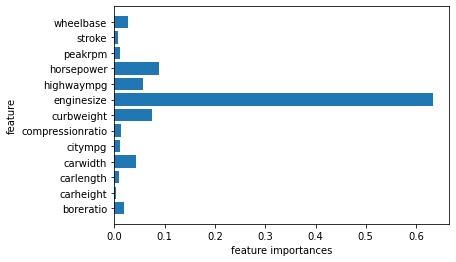

In [227]:
n_features = train_x.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(
  range(n_features),
  importances,
  align='center'
)
plt.yticks(
  np.arange(n_features),
  column_nm
)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()

### 5. 랜덤포레스트(Random Forest)

#### 1. 개념
- 랜덤포레스트는 배깅과 부스팅보다 더 많은 무작위성을 주어 약한 학습기들을 생성한 후 이를 선형결합하여 최종 학습기를 만드는 방법이다.
- 수천 개의 변수를 변수 제거 없이 모델링하므로 정확도 측면에서 좋은 성과를 보이는 기법 중 하나이다.
- 이론적인 설명이나 최종 결과에 대한 해석이 어렵다는 단점이 있지만, 예측력이 매우 높은 것으로 알려져 있다.
- 입력변수가 많은 경우 배깅 및 부스팅과 비슷하거나 더 좋은 예측력을 보인다.

**scikit-learn의 ensemble.RandomForestClassifier**
```
class sklearn.ensemble.RandomForestClassifier(
  n_estimators=100,
  *,
  criterion='gini',
  max_depth=None,
  min_samples_split=2,
  min_samples_leaf=1,
  min_weight_fraction_leaf=0.0,
  max_features='auto',
  max_leaf_nodes=None,
  min_impurity_decrease=0.0,
  bootstrap=True,
  oob_score=False,
  n_jobs=None,
  random_state=None,
  verbose=0,
  warm_start=False,
  class_weight=None,
  ccp_alpha=0.0,
  max_samples=None
)
```
- 매개변수
  - `n_estimators` : RandomForest에서 나무의 수이다.
  - `criterion` : 분할 여부를 판단하는 방법을 설정한다. `'gini'`, `'entropy'` 중 선택할 수 있다.
  - `max_depth` : 나무의 최대 깊이이다. None이면 모든 노드의 불순도가 0이거나 노드에 `min_sample_split` 미만의 샘플만 존재할 때까지 노드를 확장한다.
  - `min_samples_split` : 내부 노드를 분할하는 데 필요한 최소 샘플 수이다.
  - `min_samples_leaf` : 리프 노드에 있어야 하는 최소 샘플 수이다.
  - `max_leaf_nodes` : 리프 노드의 최대 개수이다. None이면 리프 노드 수에 제한이 없다.
  - `bootstrap` : 트리를 만들 때 붓스트랩 샘플이 사용되는지 여부이다. False이면 전체 데이터 세트가 각 트리를 생성하는 데 사용된다.
  - `oob_score` : 정확도 측정을 위해 out-of-bag 샘플을 사용할지 여부를 설정한다.
  - `random_state` : 추정량의 임의성을 제어한다.
  - `ccp_alpha` : pruning에 사용하는 파라미터이다. ccp-alpha는 최소 비용-복잡성 정리에 사용되는 복잡성 매개변수이다. ccp-alpha보다 작은 비용-복잡성을 가진 서브트리 중 가장 비용-복잡성이 큰 트리를 선택한다. default로 할 경우 pruning은 수행되지 않는다.
  - `min_impurity_decrease` : 노드가 분할되는 조건을 설정한다. 해당 값보다 크거나 같은 수준으로 불순도가 감소할 경우, 노드를 분할한다.
- 속성
  - `feature_importances_` : 변수중요도를 반환한다.
  - `oob_score` : out-of_bag을 사용해 얻은 train 데이터세트의 점수이다. `oob_score_`를 얻기 위해서는, `oob_score` 매개변수가 True로 설정해야 한다.
- 메서드
  - `fit(X, y)` : 모델을 학습시킨다.
  - `predict(X)` : 랜덤포레스트를 사용해 예측한다.
  - `predict_proba(X)` : 확률을 추정한다.
  - `score(X, y)` : 예측의 평균 정확도(Accuracy)를 반환한다.

**코드 실습**
- 배깅에서 수행한 유방암 데이터로 부스팅을 수행해보자.

In [228]:
breast = pd.read_csv('./datasets/breast-cancer.csv')

breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [229]:
breast['diagnosis'] = np.where(breast['diagnosis'] == 'M', 1, 0)
features = ['area_mean', 'texture_mean']

x = breast[features]
y = breast['diagnosis']

In [231]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
  x,
  y,
  test_size=0.3,
  stratify=y,
  random_state=1
)

print(
  train_x.shape,
  test_x.shape,
  train_y.shape,
  test_y.shape
)

(398, 2) (171, 2) (398,) (171,)


In [232]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
  n_estimators=100,
  min_samples_split=5
)

clf.fit(train_x, train_y)

RandomForestClassifier(min_samples_split=5)

In [233]:
pred = clf.predict(test_x)

print('정확도 :', clf.score(test_x, test_y))

정확도 : 0.8947368421052632


In [234]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('')
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[102   5]
 [ 13  51]]

정확도	89.47%
정밀도	91.07%
재현율	79.69%
F1	85.0%


c:\Users\Bob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


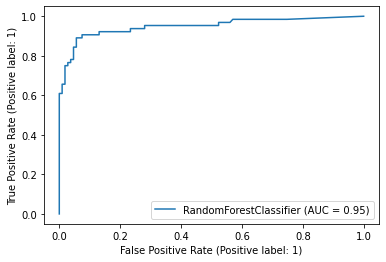

ROC AUC Score : 0.9493282710280374


In [237]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

plot_roc_curve(clf, test_x, test_y)
plt.show()

print('ROC AUC Score :', roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1]))

In [242]:
importances = clf.feature_importances_
column_nm = pd.DataFrame(['area_mean', 'texture_mean'])
feature_importances = pd.concat(
  [column_nm, pd.DataFrame(importances)],
  axis=1
)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

     feature_nm  importances
0     area_mean     0.676659
1  texture_mean     0.323341


<BarContainer object of 2 artists>

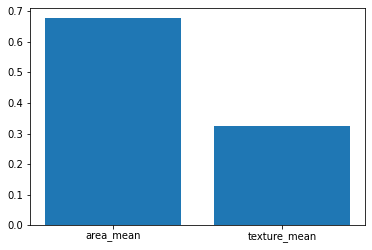

In [243]:
xtick_label_position = list(range(len(features)))
plt.xticks(xtick_label_position, features)
plt.bar(
  [x for x in range(len(importances))],
  importances
)

**scikit-learn의 ensemble.RandomForestRegressor**
```
class sklearn.ensemble.RandomForestRegressor(
  n_estimators=100,
  *,
  criterion='squared_error',
  max_depth=None,
  min_samples_split=2,
  min_samples_leaf=1,
  min_weight_fraction_leaf=0.0,
  max_features='auto',
  max_leaf_nodes=None,
  min_impurity_decrease=0.0,
  bootstrap=True,
  oob_score=False,
  n_jobs=None,
  random_state=None,
  verbose=0,
  warm_start=False,
  ccp_alpha=0.0,
  max_samples=None
)
```
- 매개변수
  - `n_estimators` : RandomForest에서 나무의 수이다.
  - `criterion` : 분할 여부를 판단하는 방법을 설정한다. `'squared_error'`, `'absolute_error'`, `'poisson'` 중 선택할 수 있다.
  - `max_depth` : 나무의 최대 깊이이다. None이면 모든 노드의 불순도가 0이거나 노드에 `min_sample_split` 미만의 샘플만 존재할 때까지 노드를 확장한다.
  - `min_samples_split` : 내부 노드를 분할하는 데 필요한 최소 샘플 수이다.
  - `min_samples_leaf` : 리프 노드에 있어야 하는 최소 샘플 수이다.
  - `max_features` : 최상의 분할을 찾을 때 고려하는 변수의 개수를 설정한다. int값으로 개수를 설정하거나 `'auto'`(변수 개수), `'sqrt'`(변수 개수의 제곱근), `'log2'`(변수 개수의 로그) 중에 하나에서 선택할 수 있다. `default=None`은 원본데이터의 변수 개수를 `max_features`로 설정한다.
  - `max_leaf_nodes` : 리프 노드의 최대 개수이다. None이면 리프 노드 수에 제한이 없다.
  - `bootstrap` : 트리를 만들 때 붓스트랩 샘플이 사용되는지 여부이다. False이면 전체 데이터 세트가 각 트리를 생성하는 데 사용된다.
  - `oob_score` : 정확도 측정을 위해 out-of-bag 샘플을 사용할지 여부를 설정한다.
  - `random_state` : 추정량의 임의성을 제어한다.
  - `ccp_alpha` : pruning에 사용하는 파라미터이다. ccp-alpha는 최소 비용-복잡성 정리에 사용되는 복잡성 매개변수이다. ccp-alpha보다 작은 비용-복잡성을 가진 서브트리 중 가장 비용-복잡성이 큰 트리를 선택한다. default로 할 경우 pruning은 수행되지 않는다.
  - `min_impurity_decrease` : 노드가 분할되는 조건을 설정한다. 해당 값보다 크거나 같은 수준으로 불순도가 감소할 경우, 노드를 분할한다.
- 속성
  - `feature_importances_` : 변수중요도를 반환한다.
  - `oob_score` : out-of_bag을 사용해 얻은 train 데이터세트의 점수이다. `oob_score_`를 얻기 위해서는, `oob_score` 매개변수가 True로 설정해야 한다.
- 메서드
  - `fit(X, y)` : 모델을 학습시킨다.
  - `predict(X)` : 랜덤포레스트를 사용해 예측한다.
  - `score(X, y)` : 예측의 평균 정확도(Accuracy)를 반환한다.

**코드 실습**
- 배깅에서 사용한 자동차 가격 데이터로 부스팅을 수행해보자.

In [244]:
car = pd.read_csv('./datasets/CarPrice_Assignment.csv')

car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [246]:
car_num = car.select_dtypes('number')
features = car_num.columns.difference(['car_ID', 'symbolic', 'price'])

x = car_num[features]
y = car_num['price']

In [247]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(
  x,
  y,
  test_size=0.3,
  random_state=1
)

print(
  train_x.shape,
  test_x.shape,
  train_y.shape,
  test_y.shape
)

(143, 14) (62, 14) (143,) (62,)


In [248]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

reg.fit(train_x, train_y)

RandomForestRegressor()

In [250]:
pred = reg.predict(test_x)

print('Accuracy :', reg.score(test_x, test_y))

Accuracy : 0.9295056962112035


In [253]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_y, pred)
mae = mean_absolute_error(test_y, pred)
rmse = np.sqrt(mse)
acc = reg.score(test_x, test_y)

print('MSE\t{}'.format(round(mse, 2)))
print('MAE\t{}'.format(round(mae, 2)))
print('RMSE\t{}'.format(round(rmse, 2)))
print('ACC\t{}%'.format(round(acc*100, 2)))

MSE	4255784.82
MAE	1381.1
RMSE	2062.96
ACC	92.95%


In [262]:
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances = pd.concat(
  [column_nm, pd.DataFrame(importances)],
  axis=1
)
feature_importances.columns = ['feature_nm', 'importance']
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

          feature_nm  importance
7         enginesize    0.657711
6         curbweight    0.201501
8         highwaympg    0.040847
9         horsepower    0.028376
3           carwidth    0.027916
13         wheelbase    0.011674
10           peakrpm    0.006839
2          carlength    0.005469
0          boreratio    0.004819
1          carheight    0.003626
4            citympg    0.003569
11            stroke    0.003293
5   compressionratio    0.003138
12         symboling    0.001221


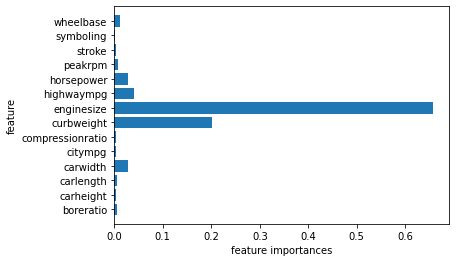

In [263]:
n_features = train_x.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align='center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()

## 제9절. 나이브베이즈(Naive Bayes) 분류

### 1. 개념
- 나이브베이즈는 데이터가 각 클래스에 속할 특징 확률을 계산하는 조건부 확률 기반의 분류 방법이다.
- 나이브(Naive)는 번역하면 '단순한'이라는 의미이다.
- 나이브베이즈 분류 기법이 예측한 특징을 상호독립적이라는 가정 하에 확률 계산을 단순화하고 모든 변수가 동등하다는 특징에서 비롯되었다.
- 베이즈는 베이지안 통계를 기반으로 입력특징이 클래스 전체의 확률 분포 대비 특정 클래스에 속할 확률을 정리하였다는 점에서 비롯되었다.
- 따라서 나이브베이즈 개념을 이해하기 위해서는 베이즈 정리가 무엇인지 알아야 한다.

#### 1. 베이즈 정리(Bayes' Theorem)
**1. 개념**
